In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import trim_mean 
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv(r"C:\Users\joel_kerala\Downloads\Dataset_3_5 - Copy.csv")
df.head()

,IDENTIFIER,TARGET,P_TYPE,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_12_AMB_3M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_16_CNT_1M,VAR_17_AMT_1M,VAR_18_CNT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_24_CNT_1M,VAR_25_CNT_1M,VAR_26_CNT_1M,VAR_27_AMT_1M,VAR_28_CNT_1M,VAR_29_AMT_1M,VAR_30_CNT_1M,VAR_31_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_39_AMT_1M,VAR_40_CNT_1M,VAR_41_CNT_1M,VAR_42_AMT_1M,VAR_43_CNT_1M,VAR_44_AMT_1M,VAR_45_CNT_1M,VAR_46_AMT_1M,VAR_47_CNT_1M,VAR_48_AMT_1M,VAR_49_CNT_1M,VAR_50_AMT_1M,VAR_51_CNT_1M,VAR_52_AMT_1M,VAR_53_CNT_1M,VAR_54_CNT_3M,VAR_55_CNT_3M,VAR_56_AMT_3M,VAR_57_CNT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_64_CNT_3M,VAR_65_CNT_3M,VAR_66_AMT_3M,VAR_67_CNT_3M,VAR_68_AMT_3M,VAR_69_CNT_3M,VAR_70_AMT_3M,VAR_71_CNT_3M,VAR_72_AMT_3M,VAR_73_CNT_3M,VAR_74_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_81_CNT_3M,VAR_82_AMT_3M,VAR_83_CNT_3M,VAR_84_CNT_3M,VAR_85_AMT_3M,VAR_86_CNT_3M,VAR_87_AMT_3M,VAR_88_CNT_3M,VAR_89_AMT_3M,VAR_90_CNT_3M,VAR_91_AMT_3M,VAR_92_CNT_3M,VAR_93_AMT_3M,VAR_94_CNT_3M,VAR_95_AMT_3M,VAR_96_CNT_3M,VAR_97_AMT_3M,VAR_98_CNT_3M,VAR_99_AMT_3M,VAR_100_CNT_3M,VAR_101_CNT_6M,VAR_102_CNT_6M,VAR_103_AMT_6M,VAR_104_CNT_6M,VAR_105_AMT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_111_CNT_6M,VAR_112_CNT_6M,VAR_113_AMT_6M,VAR_114_CNT_6M,VAR_115_AMT_6M,VAR_116_CNT_6M,VAR_117_AMT_6M,VAR_118_CNT_6M,VAR_119_AMT_6M,VAR_120_CNT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_128_CNT_6M,VAR_129_AMT_6M,VAR_130_CNT_6M,VAR_131_CNT_6M,VAR_132_AMT_6M,VAR_133_CNT_6M,VAR_134_AMT_6M,VAR_135_CNT_6M,VAR_136_AMT_6M,VAR_137_CNT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_140_AMT_6M,VAR_141_CNT_6M,VAR_142_AMT_6M,VAR_143_CNT_6M,VAR_144_AMT_6M,VAR_145_CNT_6M,VAR_146_AMT_6M,VAR_147_CNT_6M,VAR_148_AMT_6M,VAR_149_CNT_6M,VAR_150_AMT_6M,VAR_151_CNT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_154_AMT_9M,VAR_155_CNT_9M,VAR_156_AMT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_162_CNT_9M,VAR_163_CNT_9M,VAR_164_CNT_9M,VAR_165_AMT_9M,VAR_166_CNT_9M,VAR_167_AMT_9M,VAR_168_CNT_9M,VAR_169_AMT_9M,VAR_170_CNT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_174_AMT_9M,VAR_175_CNT_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_182_CNT_9M,VAR_183_AMT_9M,VAR_184_CNT_9M,VAR_185_CNT_9M,VAR_186_AMT_9M,VAR_187_CNT_9M,VAR_188_AMT_9M,VAR_189_CNT_9M,VAR_190_AMT_9M,VAR_191_CNT_9M,VAR_192_AMT_9M,VAR_193_CNT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_196_AMT_9M,VAR_197_CNT_9M,VAR_198_AMT_9M,VAR_199_CNT_9M,VAR_200_AMT_9M,VAR_201_CNT_9M,VAR_202_AMT_9M,VAR_203_CNT_9M,VAR_204_AMT_9M,VAR_205_CNT_9M,VAR_206_AMT_9M,VAR_207_CNT_9M,VAR_208_AMT_9M,VAR_209_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_214_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_217_AMT_1M,VAR_218_AMT_1M,VAR_219_AMT_1M,VAR_220_AMT_1M,VAR_221_AMT_1M,VAR_222_CNT_1M,VAR_223_CNT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_226_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_229_CNT_1M,VAR_230_CNT_1M,VAR_231_CNT_1M,VAR_232_CNT_1M,VAR_233_CNT_1M,VAR_234_AMT_1M,VAR_235_CNT_1M,VAR_236_AMT_1M,VAR_237_CNT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_242_AMT_3M,VAR_243_AMT_3M,VAR_244_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_247_AMT_3M,VAR_248_AMT_3M,VAR_249_AMT_3M,VAR_250_AMT_3M,VAR_251_AMT_3M,VAR_252_AMT_3M,VAR_253_CNT_3M,VAR_254_CNT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_257_CNT_3M,VAR_258_CNT_3M,VAR_259_CNT_3M,VAR_260_CNT_3M,VAR_261_CNT_3M,VAR_262_CNT_3M,VAR_263_CNT_3M,VAR_264_CNT_3M,VAR_265_CNT_3M,VAR_266_CNT_3M,VAR_267_CNT_3M,VAR_268_AMT_3M,VAR_269_CNT_3M,VAR_270_AMT_3M,VAR_271_CNT_3M,VAR_272_AMT_3M,VAR_273_CNT_3M,VAR_274_AMT_6M,VAR_275_AMT_6M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_278_AMT_6M,VAR_279_AMT_6M

In [4]:
colum = ['IDENTIFIER','P_TYPE','VAR_1','VAR_541',
         'VAR_542','VAR_543','VAR_544','VAR_545','VAR_546','VAR_547',
         'VAR_548','VAR_549','VAR_559','VAR_560','VAR_561','VAR_562',
         'VAR_563','VAR_564','VAR_565','VAR_566','VAR_567','VAR_568','VAR_569','VAR_570',
         'VAR_571','VAR_572','VAR_573','VAR_574','VAR_575','VAR_576','VAR_577','VAR_578',
         'VAR_579','VAR_580','VAR_581','VAR_582','VAR_583','VAR_584','VAR_585','VAR_586',
         'VAR_597','VAR_598','VAR_618','VAR_619','VAR_620','VAR_621','VAR_636','VAR_637','VAR_638','VAR_639']
df.drop(colum ,axis = 1,inplace = True)

### Correlation of columns with target {Top 20 columns}

In [5]:
correlations = df.corr()['TARGET'].sort_values()
print('Most positive correlations:\n', correlations.tail(20))
print('Most negative correlations:\n', correlations.head(20))

Most positive correlations:
 VAR_335_CNT_9M       0.056474
VAR_231_CNT_1M       0.057503
VAR_45_CNT_1M        0.057503
VAR_367_AMT_3M_9M    0.057797
VAR_601              0.059926
VAR_396_CNT_6M       0.061016
VAR_614              0.061419
VAR_23_CNT_1M        0.063253
VAR_225_CNT_1M       0.063253
VAR_410              0.066302
VAR_60_CNT_3M        0.069923
VAR_255_CNT_3M       0.069923
VAR_612              0.069981
VAR_109_CNT_6M       0.071113
VAR_292_CNT_6M       0.071113
VAR_419              0.085501
VAR_62_CNT_3M        0.088448
VAR_256_CNT_3M       0.088448
VAR_414              0.089602
TARGET               1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 VAR_503_CNT      -0.079671
#N/A.6           -0.070655
#N/A.3           -0.070654
VAR_556          -0.070521
VAR_631          -0.066890
#N/A             -0.059901
VAR_538          -0.059618
VAR_389_CNT      -0.055854
VAR_10           -0.054466
VAR_408_CNT      -0.054118
VAR_627          -0.052616
VAR_89_AMT_3M   

In [7]:
#total null values present
df.isnull().sum().sum()

706492

In [8]:
df['TARGET'].value_counts()

0    6343
1     305
Name: TARGET, dtype: int64

## Pre-Processing Functions 

#### Replacing certain column null-values with zero

In [5]:
def replace_null_nan_with_zero(df):
    
    # Select columns with 'AMT', 'TXN', and 'CNT' in their names
    selected_cols = [col for col in df.columns if ('AMT' in col or 'TXN' in col or 'CNT' in col)]
    df[selected_cols] = df[selected_cols].fillna(0)

    return df

#### Printing null-value percentages in each columns

In [6]:
def print_null_percentage_table(df):
    
    null_percentages = df.isnull().sum() / len(df) * 100
    null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})
    null_df = null_df.sort_values(by='Null Percentage')

    
    print(null_df.to_string(index=False))

#### Weight of Encoding

In [7]:
def woe_encode(encoded_train_df, encoded_test_df, cat_cols, target_col, unique_categories, smoothing_factor = 1e-5, unknown_category_value = 0):
    #encoded_train_df = train_df.copy()
    #encoded_test_df = test_df.copy()
    
    for df in [encoded_train_df,encoded_test_df]:
        for col in cat_cols:
            df[col] = np.where(df[col].isin(unique_categories[col]), df[col], 'Unknown')
            
    for col in cat_cols:
        counts = encoded_train_df.groupby(col)[target_col].agg(['count','sum'])
        counts['count'] = np.where(counts['count']==0, smoothing_factor,counts['count'])
        counts['woe'] = np.log((counts['sum'] + smoothing_factor) / (counts['sum'].sum() + smoothing_factor * len(counts)))
        encoded_train_df[col] = encoded_train_df[col].map(counts['woe'])
        encoded_test_df[col] = encoded_test_df[col].map(counts['woe']).fillna(unknown_category_value)
        
    return encoded_train_df,encoded_test_df

#### Date-time feature engineering

In [8]:
def date_time_fixer(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
            except ValueError:
                pass
    return df

#### Binning days columns

In [9]:
def bin_days_columns(data,column_name):
    bins = [-np.inf, 30,90,180,270,365,np.inf]
    labels=['<1M','1M:<=3M','3M:<=6M','6M:9<M','9M:<=12M','>=1Year']
    data['binned_'+ column_name] = pd.cut(data[column_name],bins = bins, labels=labels)
    data['binned_'+column_name] = data['binned_'+ column_name].cat.add_categories(['Null'])
    data['binned_'+ column_name].fillna('Null',inplace =True)
    return data

#### Binning negative columns

In [10]:
def bin_negative_cols(df,column_name):
    df_copy = df.copy()
    bins = [-np.inf,-1,0,np.inf]
    labels = ['Less than 0','0','Greater than 0']
    
    new_column = column_name + '_binned'
    df_copy[new_column] = pd.cut(df_copy[column_name], bins = bins,labels = labels, include_lowest = True)
    df_copy[new_column].cat.add_categories('Null', inplace = True)
    df_copy[new_column].fillna('Null', inplace = True)
    
    return df_copy

#### Printing decile distributions of the data

In [11]:
def summarize_numerical_columns(dataframe):
    # to get the numerical columns
    numerical_columns = dataframe.select_dtypes(include=[float, int]).columns.tolist()
    # creating a dictionary to store the column name, null value count and the percentiles
    summary_dict = {'Column Name': [], '1%': [], '5%': [], '10%': [], 
                    '20%': [], '30%': [], '40%': [], '50%': [], '60%': [], '70%': [], '80%': [], 
                    '90%': [], '95%': [], '99%': []}
    # This will loop through the columns and append each percentile values to the list in the dictionary
    for column in numerical_columns:
        summary_dict['Column Name'].append(column)
        
        summary_dict['1%'].append(dataframe[column].quantile(0.01))
        summary_dict['5%'].append(dataframe[column].quantile(0.05))
        summary_dict['10%'].append(dataframe[column].quantile(0.1))
        summary_dict['20%'].append(dataframe[column].quantile(0.2))
        summary_dict['30%'].append(dataframe[column].quantile(0.3))
        summary_dict['40%'].append(dataframe[column].quantile(0.4))
        summary_dict['50%'].append(dataframe[column].quantile(0.5))
        summary_dict['60%'].append(dataframe[column].quantile(0.6))
        summary_dict['70%'].append(dataframe[column].quantile(0.7))
        summary_dict['80%'].append(dataframe[column].quantile(0.8))
        summary_dict['90%'].append(dataframe[column].quantile(0.9))
        summary_dict['95%'].append(dataframe[column].quantile(0.95))
        summary_dict['99%'].append(dataframe[column].quantile(0.99))
     
    # converting the dictionary to a dataframe    
    summary_dataframe = pd.DataFrame(summary_dict)
    # to set the column name as the index 
    summary_dataframe.set_index('Column Name', inplace=True)
    
    return summary_dataframe

#### Replacing null-values with trimmed mean 

In [12]:
def replace_null_with_trimmed_mean(train,test,col, trim_percent=10):
        non_null_values_train = train[col].dropna()
        trimmed_mean = (trim_mean(non_null_values_train, trim_percent/100)).round(2)
        train[col].fillna(trimmed_mean, inplace=True)
        test[col].fillna(trimmed_mean, inplace =True)
        return train,test

#### Displaying IV Scores of features

In [13]:
def get_iv_score(data):
    iv_scores = {}
    for col in data.columns:
        contigency_table = pd.crosstab(data[col],data['TARGET'])
        iv_score = mutual_info_score(data['TARGET'],data[col])
        iv_scores[col] = iv_score.round(6)
    iv_scores_df = pd.DataFrame.from_dict(iv_scores,orient = 'index',columns= ['IV score']).sort_values('IV score',ascending = False)
    return iv_scores_df

#### Displaying number of outliers and its lower and upper bound values

In [14]:
def count_outliers(df):
    numerical_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()
    q1 = df[numerical_cols].quantile(0.25)
    q3 = df[numerical_cols].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = pd.DataFrame()
    for col in numerical_cols:
        is_outlier = (df[col]<lower_bound[col]) | (df[col] > upper_bound[col])
        n_outliers = is_outlier.sum()
        outliers = outliers.append({'column': col, 'Number of oultiers': n_outliers, 'lower bound': lower_bound[col],'upper bound': upper_bound[col]}, ignore_index = True)
    return outliers

#### Percentage distribution of target flags on non-null values of columns with high null percentage

In [19]:
def non_null_target_percent(df):
    null_per = df.isnull().sum()/len(df) * 100
    cols_to_drop = null_per[null_per > 80 ].index.tolist()
    print(cols_to_drop)
    count=[]
    non_null_per = []
    for col in cols_to_drop:
        non_null_count = (df[col].notnull()).sum()
        percentage_nonnull = non_null_count/len(df)
        non_null_per.append(percentage_nonnull)
        non_target_count = ((df[col].notnull()) & (df['TARGET'] ==1)).sum()
        nonnull_target_per = (non_target_count/305) * 100
        count.append(nonnull_target_per)
        results_df = pd.DataFrame({'non-null percent': non_null_per,
                                  'non-null target flags%': count},
                                 )
    return results_df

#### Percentage distribution of target flags of columns with high number of zeroes

In [15]:
#Features dropping for coluns with many zeroes
def analyze_zero_target_percent(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    zeroes_count=[]
    zeroes_percent=[]
    percentage_zero_target=[]
    percentage_non_zero_target=[]
    
    for col in numerical_cols:
        zeroes = (df[col] ==0).sum()
        zeroes_per = (zeroes/len(df)) * 100
        zeroes_percent.append(zeroes_per)
        nonzeroes = (df[col] !=0).sum()
        zeroes_count.append(zeroes)
        target_count = 305
        count_zero_target_flags = ((df[col] == 0) & (df['TARGET'] == 1)).sum()
        percentage_zero = (count_zero_target_flags / target_count) * 100
        percentage_zero_target.append(percentage_zero)
        nonzero_target = ((df[col] != 0) & (df['TARGET'] == 1)).sum()
        percentage_non_zero = (nonzero_target/target_count) * 100
        percentage_non_zero_target.append(percentage_non_zero)
    result_df = pd.DataFrame({'Zero_count': zeroes_count,
                              'Zero %': zeroes_percent,
                            'Zero-target_flag %':percentage_zero_target,
                            'NonZero-target_flag %':percentage_non_zero_target},
                            index = numerical_cols)
    return result_df

#### Distribution of target flags of all columns in each deciles

In [16]:
# funtion for count of target flags in each decile distribution
def deciles_target_flags_count(new_d,target_col):
    
    numerical_cols = new_d.select_dtypes(include=[np.number]).columns
    percentiles = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]
    percentiles_df = new_d[numerical_cols].quantile(percentiles)
    col_dict = {}
    for col in numerical_cols:
        
        if col != target_col:

            col_counts = []
            upper_bound = percentiles_df.loc[percentiles[0],col]
            slice_df = new_d.loc[(new_d[col] <= upper_bound)]
            count=(slice_df[target_col] == 1).sum()
            col_counts.append(count)
            for i in range(len(percentiles)-1):

                lower_bound = percentiles_df.loc[percentiles[i],col]
                upper_bound = percentiles_df.loc[percentiles[i+1],col]
                slice_df = new_d.loc[(new_d[col] > lower_bound) & (new_d[col] <= upper_bound)]
                count=(slice_df[target_col] == 1).sum()
                col_counts.append(count)
            col_dict[col] = col_counts
    counts_df = pd.DataFrame(col_dict,index = percentiles)
    return counts_df.transpose()

In [18]:
print_null_percentage_table(df)

            Column  Null Percentage
            TARGET         0.000000
           VAR_518         0.000000
           VAR_519         0.000000
           VAR_520         0.000000
           VAR_521         0.000000
           VAR_522         0.000000
           VAR_523         0.000000
           VAR_524         0.000000
           VAR_525         0.000000
           VAR_526         0.000000
           VAR_527         0.000000
           VAR_528         0.000000
           VAR_529         0.000000
           VAR_530         0.000000
           VAR_531         0.000000
           VAR_532         0.000000
           VAR_533         0.000000
           VAR_534         0.000000
           VAR_535         0.000000
           VAR_536         0.000000
           VAR_537         0.000000
           VAR_538         0.000000
           VAR_517         0.000000
           VAR_516         0.000000
           VAR_515         0.000000
           VAR_514         0.000000
   VAR_379_CNT__3M         0

In [19]:
summarize_numerical_columns(df)

,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%
Column Name,,,,,,,,,,,,,
VAR_11_AMB_1M,0.250000,1.503500,14.441000,433.402000,980.943000,1529.992000,2267.645000,3170.624000,4339.103000,6381.588000,1.168997e+04,1.985690e+04,8.417287e+04
VAR_12_AMB_3M,0.460000,2.320000,75.078000,755.528000,1340.019000,1993.502000,2760.120000,3674.562000,4772.079000,6494.184000,9.799505e+03,1.509772e+04,7.899788e+04
VAR_13_AMB_6M,0.699400,5.824500,182.478000,936.772000,1546.110000,2243.780000,3001.445000,3940.260000,4996.050000,6555.270000,8.953158e+03,1.479560e+04,7.540863e+04
VAR_14_AMB_9M,0.933500,19.461500,279.786000,1039.972000,1680.396000,2453.880000,3233.885000,4224.184000,5476.227000,6999.730000,1.042387e+04,1.803487e+04,8.550814e+04
VAR_15_CNT_1M,1.000000,2.000000,4.000000,9.000000,16.000000,25.000000,36.000000,48.000000,65.000000,87.000000,1.240000e+02,1.600000e+02,2.550000e+02
VAR_16_CNT_1M,0.000000,1.000000,1.000000,3.000000,4.000000,7.000000,10.000000,15.000000,20.000000,28.000000,4.200000e+01,5.900000e+01,1.340000e+02
VAR_17_AMT_1M,0.000000,500.000000,3491.000000,10297.200000,18719.000000,28206.616000,40000.000000,56395.400000,80000.000000,116722.400000,2.022312e+05,3.149559e+05,7.166448e+05
VAR_18_CNT_1M,0.000000,1.000000,2.000000,5.000000,10.000000,17.000000,24.000000,32.000000,42.000000,57.000000,8.200000e+01,1.050000e+02,1.630000e+02
VAR_19_AMT_1M,0.000000,1300.000000,4000.000000,11499.200000,19415.576000,28915.572000,41198.000000,56516.000000,80093.848000,116818.000000,2.002647e+05,3.106047e+05,7.188155e+05


In [22]:
out = count_outliers(df)
print(out)

     Number of oultiers             column    lower bound   upper bound
0                 305.0             TARGET       0.000000  0.000000e+00
1                  69.0              VAR_9       9.000000  5.700000e+01
2                 405.0             VAR_10     -45.000000  1.470000e+02
3                 647.0      VAR_11_AMB_1M   -6075.865000  1.200541e+04
4                 469.0      VAR_12_AMB_3M   -5632.967500  1.218733e+04
5                 382.0      VAR_13_AMB_6M   -5509.127500  1.248673e+04
6                 458.0      VAR_14_AMB_9M   -5851.368750  1.336826e+04
7                 250.0      VAR_15_CNT_1M     -81.000000  1.670000e+02
8                 349.0      VAR_16_CNT_1M     -27.000000  5.300000e+01
9                 534.0      VAR_17_AMT_1M -105425.000000  2.153350e+05
10                246.0      VAR_18_CNT_1M     -53.500000  1.105000e+02
11                526.0      VAR_19_AMT_1M -104235.125000  2.151607e+05
12                655.0      VAR_20_AMT_1M  -13500.000000  2.250

In [17]:
df = replace_null_nan_with_zero(df)

#### Target flag distribution in non-null values 

In [20]:
v = non_null_target_percent(df)
v

['VAR_8', 'VAR_31_1M', 'VAR_74_3M', 'VAR_409', 'VAR_410', 'VAR_413', 'VAR_414', 'VAR_415', 'VAR_417', 'VAR_418', 'VAR_419', 'VAR_420', 'VAR_422', 'VAR_423', 'VAR_424', 'VAR_425', 'VAR_427', 'VAR_428', 'VAR_429', 'VAR_430', '#N/A.2']


,non-null percent,non-null target flags%
0,0.152377,11.475410
1,0.153430,9.836066
2,0.240975,15.081967
3,0.122593,2.950820
4,0.122593,2.950820
5,0.091155,1.639344
6,0.038809,1.311475
7,0.122593,2.950820
8,0.117780,2.295082
9,0.098676,1.967213


#### Since target flag distribution is very low, those columns having greater than 80% null values are deleted

In [21]:
cols_to_drop = ['VAR_31_1M', 'VAR_74_3M', 'VAR_409', 'VAR_410', 'VAR_413', 'VAR_414', 'VAR_415', 'VAR_417', 'VAR_418', 'VAR_419', 'VAR_420', 'VAR_422', 'VAR_423', 'VAR_424', 'VAR_425', 'VAR_427', 'VAR_428', 'VAR_429', 'VAR_430', '#N/A.2','VAR_8']
df.drop(cols_to_drop,axis = 1,inplace = True)

#### Negative Columns to be binned

In [22]:
selected_cols_bin = ['VAR_602','VAR_606','VAR_607','VAR_608','VAR_609','VAR_610','VAR_614','VAR_625','VAR_627','VAR_626']

In [23]:
df = date_time_fixer(df)

#### Date columns feature engineering part

In [24]:
lis = ['VAR_2','VAR_3','VAR_4','VAR_5','VAR_6','VAR_7']
data = df
for col in lis:
    date_col_name = col
    current_date = dt.datetime.now()
    data[f'day_since_{col}'] = data[col].apply(lambda x: (current_date - x).days)
    
df.head()

,TARGET,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_12_AMB_3M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_16_CNT_1M,VAR_17_AMT_1M,VAR_18_CNT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_24_CNT_1M,VAR_25_CNT_1M,VAR_26_CNT_1M,VAR_27_AMT_1M,VAR_28_CNT_1M,VAR_29_AMT_1M,VAR_30_CNT_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_39_AMT_1M,VAR_40_CNT_1M,VAR_41_CNT_1M,VAR_42_AMT_1M,VAR_43_CNT_1M,VAR_44_AMT_1M,VAR_45_CNT_1M,VAR_46_AMT_1M,VAR_47_CNT_1M,VAR_48_AMT_1M,VAR_49_CNT_1M,VAR_50_AMT_1M,VAR_51_CNT_1M,VAR_52_AMT_1M,VAR_53_CNT_1M,VAR_54_CNT_3M,VAR_55_CNT_3M,VAR_56_AMT_3M,VAR_57_CNT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_64_CNT_3M,VAR_65_CNT_3M,VAR_66_AMT_3M,VAR_67_CNT_3M,VAR_68_AMT_3M,VAR_69_CNT_3M,VAR_70_AMT_3M,VAR_71_CNT_3M,VAR_72_AMT_3M,VAR_73_CNT_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_81_CNT_3M,VAR_82_AMT_3M,VAR_83_CNT_3M,VAR_84_CNT_3M,VAR_85_AMT_3M,VAR_86_CNT_3M,VAR_87_AMT_3M,VAR_88_CNT_3M,VAR_89_AMT_3M,VAR_90_CNT_3M,VAR_91_AMT_3M,VAR_92_CNT_3M,VAR_93_AMT_3M,VAR_94_CNT_3M,VAR_95_AMT_3M,VAR_96_CNT_3M,VAR_97_AMT_3M,VAR_98_CNT_3M,VAR_99_AMT_3M,VAR_100_CNT_3M,VAR_101_CNT_6M,VAR_102_CNT_6M,VAR_103_AMT_6M,VAR_104_CNT_6M,VAR_105_AMT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_111_CNT_6M,VAR_112_CNT_6M,VAR_113_AMT_6M,VAR_114_CNT_6M,VAR_115_AMT_6M,VAR_116_CNT_6M,VAR_117_AMT_6M,VAR_118_CNT_6M,VAR_119_AMT_6M,VAR_120_CNT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_128_CNT_6M,VAR_129_AMT_6M,VAR_130_CNT_6M,VAR_131_CNT_6M,VAR_132_AMT_6M,VAR_133_CNT_6M,VAR_134_AMT_6M,VAR_135_CNT_6M,VAR_136_AMT_6M,VAR_137_CNT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_140_AMT_6M,VAR_141_CNT_6M,VAR_142_AMT_6M,VAR_143_CNT_6M,VAR_144_AMT_6M,VAR_145_CNT_6M,VAR_146_AMT_6M,VAR_147_CNT_6M,VAR_148_AMT_6M,VAR_149_CNT_6M,VAR_150_AMT_6M,VAR_151_CNT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_154_AMT_9M,VAR_155_CNT_9M,VAR_156_AMT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_162_CNT_9M,VAR_163_CNT_9M,VAR_164_CNT_9M,VAR_165_AMT_9M,VAR_166_CNT_9M,VAR_167_AMT_9M,VAR_168_CNT_9M,VAR_169_AMT_9M,VAR_170_CNT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_174_AMT_9M,VAR_175_CNT_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_182_CNT_9M,VAR_183_AMT_9M,VAR_184_CNT_9M,VAR_185_CNT_9M,VAR_186_AMT_9M,VAR_187_CNT_9M,VAR_188_AMT_9M,VAR_189_CNT_9M,VAR_190_AMT_9M,VAR_191_CNT_9M,VAR_192_AMT_9M,VAR_193_CNT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_196_AMT_9M,VAR_197_CNT_9M,VAR_198_AMT_9M,VAR_199_CNT_9M,VAR_200_AMT_9M,VAR_201_CNT_9M,VAR_202_AMT_9M,VAR_203_CNT_9M,VAR_204_AMT_9M,VAR_205_CNT_9M,VAR_206_AMT_9M,VAR_207_CNT_9M,VAR_208_AMT_9M,VAR_209_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_214_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_217_AMT_1M,VAR_218_AMT_1M,VAR_219_AMT_1M,VAR_220_AMT_1M,VAR_221_AMT_1M,VAR_222_CNT_1M,VAR_223_CNT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_226_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_229_CNT_1M,VAR_230_CNT_1M,VAR_231_CNT_1M,VAR_232_CNT_1M,VAR_233_CNT_1M,VAR_234_AMT_1M,VAR_235_CNT_1M,VAR_236_AMT_1M,VAR_237_CNT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_242_AMT_3M,VAR_243_AMT_3M,VAR_244_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_247_AMT_3M,VAR_248_AMT_3M,VAR_249_AMT_3M,VAR_250_AMT_3M,VAR_251_AMT_3M,VAR_252_AMT_3M,VAR_253_CNT_3M,VAR_254_CNT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_257_CNT_3M,VAR_258_CNT_3M,VAR_259_CNT_3M,VAR_260_CNT_3M,VAR_261_CNT_3M,VAR_262_CNT_3M,VAR_263_CNT_3M,VAR_264_CNT_3M,VAR_265_CNT_3M,VAR_266_CNT_3M,VAR_267_CNT_3M,VAR_268_AMT_3M,VAR_269_CNT_3M,VAR_270_AMT_3M,VAR_271_CNT_3M,VAR_272_AMT_3M,VAR_273_CNT_3M,VAR_274_AMT_6M,VAR_275_AMT_6M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_278_AMT_6M,VAR_279_AMT_6M,VAR_280_AMT_6M,VAR_281_AMT_6M,VAR_282_AMT_6M,VAR_

In [25]:
df.drop(['VAR_2','VAR_3','VAR_4','VAR_5','VAR_6','VAR_7'],axis = 1,inplace = True)

In [30]:
print_null_percentage_table(df)

            Column  Null Percentage
            TARGET         0.000000
   VAR_379_CNT__3M         0.000000
   VAR_378_CNT__1M         0.000000
 VAR_377_AMT_6M_9M         0.000000
 VAR_376_AMT_3M_9M         0.000000
 VAR_375_AMT_3M_6M         0.000000
   VAR_374_AMT__9M         0.000000
   VAR_373_AMT__6M         0.000000
   VAR_372_AMT__3M         0.000000
   VAR_371_AMT__9M         0.000000
   VAR_370_AMT__6M         0.000000
   VAR_369_AMT__3M         0.000000
 VAR_368_AMT_6M_9M         0.000000
 VAR_367_AMT_3M_9M         0.000000
   VAR_366_AMT__9M         0.000000
   VAR_365_AMT__6M         0.000000
   VAR_364_AMT__3M         0.000000
   VAR_363_AMT__9M         0.000000
   VAR_362_AMT__6M         0.000000
   VAR_361_AMT__3M         0.000000
   VAR_360_AMT__1M         0.000000
    VAR_359_CNT_9M         0.000000
    VAR_358_AMT_9M         0.000000
    VAR_357_CNT_9M         0.000000
    VAR_356_AMT_9M         0.000000
    VAR_355_CNT_9M         0.000000
    VAR_354_AMT_9M         0

In [31]:
d = deciles_target_flags_count(df,'TARGET')
d

,0.01,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99,1.00
VAR_9,2,25,7,34,27,38,22,20,32,34,36,16,11,1
VAR_10,2,20,15,34,43,37,31,33,32,28,15,8,4,3
VAR_11_AMB_1M,5,34,37,66,33,31,22,13,29,11,12,7,3,2
VAR_12_AMB_3M,5,35,42,58,47,25,23,15,16,13,18,3,5,0
VAR_13_AMB_6M,4,33,41,75,35,24,24,16,20,16,10,2,4,1
VAR_14_AMB_9M,5,34,43,74,33,27,24,15,20,9,12,3,5,1
VAR_15_CNT_1M,67,0,0,17,20,27,25,24,22,24,41,14,14,10
VAR_16_CNT_1M,71,0,0,17,14,28,30,18,23,27,39,17,12,9
VAR_17_AMT_1M,71,0,0,17,34,27,24,23,32,25,24,9,15,4
VAR_18_CNT_1M,71,0,0,17,22,28,16,29,21,25,36,15,15,10


### Analyzing the sparse columns and their target flag distribution

In [26]:
s =analyze_zero_target_percent(df)
s['Zero-target_flag %'] = s['Zero-target_flag %'].round()
s

,Zero_count,Zero %,Zero-target_flag %,NonZero-target_flag %
TARGET,6343,95.412154,0.0,100.000000
VAR_9,0,0.000000,0.0,100.000000
VAR_10,15,0.225632,0.0,100.000000
VAR_11_AMB_1M,38,0.571600,1.0,99.016393
VAR_12_AMB_3M,26,0.391095,0.0,99.672131
VAR_13_AMB_6M,19,0.285800,0.0,100.000000
VAR_14_AMB_9M,16,0.240674,0.0,100.000000
VAR_15_CNT_1M,879,13.222022,22.0,78.032787
VAR_16_CNT_1M,1069,16.080024,23.0,76.721311
VAR_17_AMT_1M,1069,16.080024,23.0,76.721311


In [27]:
s_greater_80 = s.loc[(s['Zero-target_flag %'] >= 80)].sort_values('Zero-target_flag %')
s_greater_80

,Zero_count,Zero %,Zero-target_flag %,NonZero-target_flag %
VAR_68_AMT_3M,4996,75.150421,80.0,20.000000
VAR_474_AMT_6M,5162,77.647413,80.0,19.672131
VAR_466_AMT_6M,4801,72.217208,80.0,19.672131
VAR_243_AMT_3M,4996,75.150421,80.0,20.000000
VAR_258_CNT_3M,4996,75.150421,80.0,20.000000
VAR_69_CNT_3M,4996,75.150421,80.0,20.000000
VAR_613,6006,90.342960,80.0,19.672131
VAR_468_AMT_6M,4907,73.811673,81.0,19.016393
VAR_119_AMT_6M,4666,70.186522,82.0,18.032787
VAR_120_CNT_6M,4666,70.186522,82.0,18.032787


In [28]:
zero_cols = s_greater_80.index.tolist()
zero_cols

['VAR_68_AMT_3M',
 'VAR_474_AMT_6M',
 'VAR_466_AMT_6M',
 'VAR_243_AMT_3M',
 'VAR_258_CNT_3M',
 'VAR_69_CNT_3M',
 'VAR_613',
 'VAR_468_AMT_6M',
 'VAR_119_AMT_6M',
 'VAR_120_CNT_6M',
 'VAR_24_CNT_1M',
 'VAR_374_AMT__9M',
 'VAR_384_CNT__9M',
 'VAR_454_AMT_3M',
 'VAR_475_AMT_9M',
 'VAR_482_AMT_9M',
 'VAR_371_AMT__9M',
 'VAR_381_CNT__9M',
 'VAR_624',
 'VAR_612',
 'VAR_231_CNT_1M',
 'VAR_219_AMT_1M',
 'VAR_45_CNT_1M',
 'VAR_44_AMT_1M',
 'VAR_383_CNT__6M',
 'VAR_380_CNT__6M',
 'VAR_386_CNT_6M_9M',
 'VAR_370_AMT__6M',
 'VAR_479_AMT_9M',
 'VAR_373_AMT__6M',
 'VAR_377_AMT_6M_9M',
 'VAR_457_AMT_3M',
 'VAR_395_CNT_9M',
 'VAR_487_AMT_9M',
 'VAR_467_AMT_6M',
 'VAR_72_AMT_3M',
 'VAR_73_CNT_3M',
 'VAR_92_CNT_3M',
 'VAR_455_AMT_3M',
 'VAR_91_AMT_3M',
 'VAR_266_CNT_3M',
 'VAR_251_AMT_3M',
 'VAR_589',
 'VAR_469_AMT_6M',
 'VAR_463_AMT_6M',
 'VAR_318_AMT_9M',
 'VAR_397_CNT_9M',
 'VAR_378_CNT__1M',
 'VAR_379_CNT__3M',
 'VAR_50_AMT_1M',
 'VAR_382_CNT__3M',
 'VAR_336_CNT_9M',
 'VAR_234_AMT_1M',
 'VAR_235_CNT_

In [29]:
len(zero_cols)

241

In [30]:
df.drop(zero_cols,axis = 1,inplace = True)
len(df.columns)

339

#### Sparse columns { greater than 80% zero values) are deleted

## Train - Test Split

In [31]:
X = df.drop(labels=['TARGET'],axis = 1)
y = df['TARGET']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5318, 338)
(1330, 338)


In [33]:
print(X_train.shape)
print(X_test.shape)

(5318, 338)
(1330, 338)


In [34]:
print(y_train.shape)
print(y_test.shape)

(5318,)
(1330,)


In [43]:
X_copy_train = X_train.copy()
y_copy_train = y_train.copy()

In [44]:
train_copy = pd.concat([X_copy_train,y_copy_train],axis = 1)

In [51]:
train_copy['TARGET'].value_counts()

0    5078
1     240
Name: TARGET, dtype: int64

In [48]:
X_train_target = train_copy.drop(labels =['TARGET'],axis =1)
X_train_target.head()

,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_12_AMB_3M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_16_CNT_1M,VAR_17_AMT_1M,VAR_18_CNT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_41_CNT_1M,VAR_42_AMT_1M,VAR_43_CNT_1M,VAR_46_AMT_1M,VAR_47_CNT_1M,VAR_52_AMT_1M,VAR_53_CNT_1M,VAR_54_CNT_3M,VAR_55_CNT_3M,VAR_56_AMT_3M,VAR_57_CNT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_64_CNT_3M,VAR_65_CNT_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_81_CNT_3M,VAR_84_CNT_3M,VAR_85_AMT_3M,VAR_86_CNT_3M,VAR_87_AMT_3M,VAR_88_CNT_3M,VAR_89_AMT_3M,VAR_90_CNT_3M,VAR_95_AMT_3M,VAR_96_CNT_3M,VAR_99_AMT_3M,VAR_100_CNT_3M,VAR_101_CNT_6M,VAR_102_CNT_6M,VAR_103_AMT_6M,VAR_104_CNT_6M,VAR_105_AMT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_111_CNT_6M,VAR_112_CNT_6M,VAR_115_AMT_6M,VAR_116_CNT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_128_CNT_6M,VAR_131_CNT_6M,VAR_132_AMT_6M,VAR_133_CNT_6M,VAR_134_AMT_6M,VAR_135_CNT_6M,VAR_136_AMT_6M,VAR_137_CNT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_144_AMT_6M,VAR_145_CNT_6M,VAR_148_AMT_6M,VAR_149_CNT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_154_AMT_9M,VAR_155_CNT_9M,VAR_156_AMT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_162_CNT_9M,VAR_163_CNT_9M,VAR_167_AMT_9M,VAR_168_CNT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_182_CNT_9M,VAR_185_CNT_9M,VAR_186_AMT_9M,VAR_187_CNT_9M,VAR_188_AMT_9M,VAR_189_CNT_9M,VAR_190_AMT_9M,VAR_191_CNT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_202_AMT_9M,VAR_203_CNT_9M,VAR_206_AMT_9M,VAR_207_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_218_AMT_1M,VAR_220_AMT_1M,VAR_222_CNT_1M,VAR_223_CNT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_230_CNT_1M,VAR_232_CNT_1M,VAR_236_AMT_1M,VAR_237_CNT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_248_AMT_3M,VAR_249_AMT_3M,VAR_250_AMT_3M,VAR_253_CNT_3M,VAR_254_CNT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_260_CNT_3M,VAR_261_CNT_3M,VAR_263_CNT_3M,VAR_264_CNT_3M,VAR_265_CNT_3M,VAR_268_AMT_3M,VAR_269_CNT_3M,VAR_272_AMT_3M,VAR_273_CNT_3M,VAR_274_AMT_6M,VAR_275_AMT_6M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_279_AMT_6M,VAR_281_AMT_6M,VAR_282_AMT_6M,VAR_284_AMT_6M,VAR_285_AMT_6M,VAR_286_AMT_6M,VAR_287_AMT_6M,VAR_289_CNT_6M,VAR_290_CNT_6M,VAR_291_CNT_6M,VAR_292_CNT_6M,VAR_294_CNT_6M,VAR_296_CNT_6M,VAR_297_CNT_6M,VAR_299_CNT_6M,VAR_300_CNT_6M,VAR_301_CNT_6M,VAR_302_CNT_6M,VAR_306_AMT_6M,VAR_307_CNT_6M,VAR_310_AMT_6M,VAR_311_CNT_6M,VAR_314_AMT_9M,VAR_315_AMT_9M,VAR_316_AMT_9M,VAR_317_AMT_9M,VAR_319_AMT_9M,VAR_322_AMT_9M,VAR_323_AMT_9M,VAR_325_AMT_9M,VAR_326_AMT_9M,VAR_327_AMT_9M,VAR_329_AMT_9M,VAR_332_CNT_9M,VAR_333_CNT_9M,VAR_334_CNT_9M,VAR_335_CNT_9M,VAR_337_CNT_9M,VAR_340_CNT_9M,VAR_341_CNT_9M,VAR_343_CNT_9M,VAR_344_CNT_9M,VAR_345_CNT_9M,VAR_347_CNT_9M,VAR_352_AMT_9M,VAR_353_CNT_9M,VAR_356_AMT_9M,VAR_357_CNT_9M,VAR_387_CNT,VAR_388_CNT,VAR_389_CNT,VAR_398_CNT_3M,VAR_399_CNT_6M,VAR_400_CNT_9M,VAR_416,VAR_421,VAR_426,VAR_435,VAR_437,VAR_438_1M,VAR_439,VAR_440_3M,VAR_441,VAR_442_6M,VAR_443,VAR_444_9M,VAR_451_AMT_1M,VAR_460_AMT_3M,VAR_464_AMT_6M,VAR_472_AMT_6M,VAR_476_AMT_9M,VAR_478_AMT_9M,VAR_480_AMT_9M,VAR_485_AMT_9M,VAR_488_AMT_9M,VAR_489,VAR_490,VAR_491,VAR_492,VAR_493,VAR_494,VAR_495,VAR_496,VAR_497,VAR_498,VAR_499,VAR_500,VAR_501_CNT,VAR_502,VAR_503_CNT,VAR_504,VAR_505,VAR_506__MTH_3M,VAR_507__MTH_6M,VAR_508__MTH_9M,VAR_509__CNT_3M,VAR_510__CNT_6M,VAR_511__CNT_9M,#N/A,#N/A.1,#N/A.3,#N/A.4,#N/A.5,#N/A.6,#N/A.7,#N/A.8,VAR_512_AMB_3M,VAR_513_AMB_6M,VAR_533,VAR_534,VAR_535,VAR_538,VAR_539,VAR_540,VAR_550,VAR_551,VAR_552,VAR_553,VAR_554,VAR_555,VAR_556

### Start Binning

#### Train and test are separately preprocessed to avoid any data leakage

In [35]:
X_train = bin_days_columns(X_train,'day_since_VAR_2')
X_train = bin_days_columns(X_train,'day_since_VAR_3')
X_train = bin_days_columns(X_train,'day_since_VAR_4')
X_train = bin_days_columns(X_train,'day_since_VAR_5')
X_train = bin_days_columns(X_train,'day_since_VAR_6')
X_train = bin_days_columns(X_train,'day_since_VAR_7')

In [36]:
X_test = bin_days_columns(X_test,'day_since_VAR_2')
X_test = bin_days_columns(X_test,'day_since_VAR_3')
X_test = bin_days_columns(X_test,'day_since_VAR_4')
X_test = bin_days_columns(X_test,'day_since_VAR_5')
X_test = bin_days_columns(X_test,'day_since_VAR_6')
X_test = bin_days_columns(X_test,'day_since_VAR_7')

In [37]:
X_train.drop(['day_since_VAR_2','day_since_VAR_3','day_since_VAR_5','day_since_VAR_7','day_since_VAR_6','day_since_VAR_4'],axis = 1,inplace = True)
X_test.drop(['day_since_VAR_2','day_since_VAR_3','day_since_VAR_5','day_since_VAR_7','day_since_VAR_6','day_since_VAR_4'],axis = 1,inplace = True)

In [38]:
for i in selected_cols_bin:
    X_train = bin_negative_cols(X_train,i)
    
X_train.drop(selected_cols_bin,axis = 1, inplace = True)

In [39]:
for i in selected_cols_bin:
    X_test = bin_negative_cols(X_test,i)
    
X_test.drop(selected_cols_bin,axis = 1, inplace = True)

In [40]:
null_per = X_train.isnull().sum()/len(X_train) * 100
nullvalues_cols = null_per[null_per > 0 ].index.tolist()
print(len(nullvalues_cols))
print(nullvalues_cols)

41
['VAR_34_1M', 'VAR_77_3M', 'VAR_121_6M', 'VAR_124_6M', 'VAR_173_9M', 'VAR_178_9M', 'VAR_435', 'VAR_437', 'VAR_438_1M', 'VAR_439', 'VAR_440_3M', 'VAR_441', 'VAR_442_6M', 'VAR_443', 'VAR_444_9M', 'VAR_489', 'VAR_490', 'VAR_491', 'VAR_492', 'VAR_493', 'VAR_494', 'VAR_495', 'VAR_496', 'VAR_497', 'VAR_498', 'VAR_499', 'VAR_500', 'VAR_502', 'VAR_504', 'VAR_505', 'VAR_506__MTH_3M', 'VAR_507__MTH_6M', 'VAR_508__MTH_9M', '#N/A', '#N/A.1', '#N/A.3', '#N/A.4', '#N/A.5', '#N/A.6', '#N/A.7', '#N/A.8']


#### Imputing null values using trimmed mean

In [41]:
for c in nullvalues_cols:
    X_train,X_test = replace_null_with_trimmed_mean(X_train,X_test,c, trim_percent=10)

In [42]:
null_per = X_test.isnull().sum()/len(X_test) * 100
nullvalues_cols = null_per[null_per > 0 ].index.tolist()
print(len(nullvalues_cols))
print(nullvalues_cols)

0
[]


## Weight of Encoding

In [45]:
cat_cols = ['binned_day_since_VAR_2','binned_day_since_VAR_3','binned_day_since_VAR_4','binned_day_since_VAR_5','binned_day_since_VAR_6','binned_day_since_VAR_7']
target_col = 'TARGET'
unique_categories = {
    'binned_day_since_VAR_2' : train_copy['binned_day_since_VAR_2'].unique(),
    'binned_day_since_VAR_3' : train_copy['binned_day_since_VAR_3'].unique(),
    'binned_day_since_VAR_4' : train_copy['binned_day_since_VAR_4'].unique(),
    'binned_day_since_VAR_5' : train_copy['binned_day_since_VAR_5'].unique(),
    'binned_day_since_VAR_6' : train_copy['binned_day_since_VAR_6'].unique(),
    'binned_day_since_VAR_7' : train_copy['binned_day_since_VAR_7'].unique()
    
}
train_copy, X_test = woe_encode(train_copy,X_test, cat_cols, target_col, unique_categories)

In [46]:
cat_cols =['VAR_602_binned','VAR_606_binned','VAR_607_binned','VAR_608_binned','VAR_609_binned','VAR_610_binned','VAR_614_binned','VAR_625_binned','VAR_627_binned','VAR_626_binned'] 
target_col = 'TARGET'
unique_categories = {
    'VAR_602_binned' : train_copy['VAR_602_binned'].unique(),
    'VAR_606_binned' : train_copy['VAR_606_binned'].unique(),
    'VAR_607_binned' : train_copy['VAR_607_binned'].unique(),
    'VAR_608_binned' : train_copy['VAR_608_binned'].unique(),
    'VAR_609_binned' : train_copy['VAR_609_binned'].unique(),
    'VAR_610_binned' : train_copy['VAR_610_binned'].unique(),
    'VAR_614_binned' : train_copy['VAR_614_binned'].unique(),
    'VAR_625_binned' : train_copy['VAR_625_binned'].unique(),
    'VAR_627_binned' : train_copy['VAR_627_binned'].unique(),
    'VAR_626_binned' : train_copy['VAR_626_binned'].unique()
}
train_copy, X_test = woe_encode(train_copy,X_test, cat_cols, target_col, unique_categories)

In [46]:
train_copy.head()

,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_12_AMB_3M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_16_CNT_1M,VAR_17_AMT_1M,VAR_18_CNT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_41_CNT_1M,VAR_42_AMT_1M,VAR_43_CNT_1M,VAR_46_AMT_1M,VAR_47_CNT_1M,VAR_52_AMT_1M,VAR_53_CNT_1M,VAR_54_CNT_3M,VAR_55_CNT_3M,VAR_56_AMT_3M,VAR_57_CNT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_64_CNT_3M,VAR_65_CNT_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_81_CNT_3M,VAR_84_CNT_3M,VAR_85_AMT_3M,VAR_86_CNT_3M,VAR_87_AMT_3M,VAR_88_CNT_3M,VAR_89_AMT_3M,VAR_90_CNT_3M,VAR_95_AMT_3M,VAR_96_CNT_3M,VAR_99_AMT_3M,VAR_100_CNT_3M,VAR_101_CNT_6M,VAR_102_CNT_6M,VAR_103_AMT_6M,VAR_104_CNT_6M,VAR_105_AMT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_111_CNT_6M,VAR_112_CNT_6M,VAR_115_AMT_6M,VAR_116_CNT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_128_CNT_6M,VAR_131_CNT_6M,VAR_132_AMT_6M,VAR_133_CNT_6M,VAR_134_AMT_6M,VAR_135_CNT_6M,VAR_136_AMT_6M,VAR_137_CNT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_144_AMT_6M,VAR_145_CNT_6M,VAR_148_AMT_6M,VAR_149_CNT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_154_AMT_9M,VAR_155_CNT_9M,VAR_156_AMT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_162_CNT_9M,VAR_163_CNT_9M,VAR_167_AMT_9M,VAR_168_CNT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_182_CNT_9M,VAR_185_CNT_9M,VAR_186_AMT_9M,VAR_187_CNT_9M,VAR_188_AMT_9M,VAR_189_CNT_9M,VAR_190_AMT_9M,VAR_191_CNT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_202_AMT_9M,VAR_203_CNT_9M,VAR_206_AMT_9M,VAR_207_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_218_AMT_1M,VAR_220_AMT_1M,VAR_222_CNT_1M,VAR_223_CNT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_230_CNT_1M,VAR_232_CNT_1M,VAR_236_AMT_1M,VAR_237_CNT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_248_AMT_3M,VAR_249_AMT_3M,VAR_250_AMT_3M,VAR_253_CNT_3M,VAR_254_CNT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_260_CNT_3M,VAR_261_CNT_3M,VAR_263_CNT_3M,VAR_264_CNT_3M,VAR_265_CNT_3M,VAR_268_AMT_3M,VAR_269_CNT_3M,VAR_272_AMT_3M,VAR_273_CNT_3M,VAR_274_AMT_6M,VAR_275_AMT_6M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_279_AMT_6M,VAR_281_AMT_6M,VAR_282_AMT_6M,VAR_284_AMT_6M,VAR_285_AMT_6M,VAR_286_AMT_6M,VAR_287_AMT_6M,VAR_289_CNT_6M,VAR_290_CNT_6M,VAR_291_CNT_6M,VAR_292_CNT_6M,VAR_294_CNT_6M,VAR_296_CNT_6M,VAR_297_CNT_6M,VAR_299_CNT_6M,VAR_300_CNT_6M,VAR_301_CNT_6M,VAR_302_CNT_6M,VAR_306_AMT_6M,VAR_307_CNT_6M,VAR_310_AMT_6M,VAR_311_CNT_6M,VAR_314_AMT_9M,VAR_315_AMT_9M,VAR_316_AMT_9M,VAR_317_AMT_9M,VAR_319_AMT_9M,VAR_322_AMT_9M,VAR_323_AMT_9M,VAR_325_AMT_9M,VAR_326_AMT_9M,VAR_327_AMT_9M,VAR_329_AMT_9M,VAR_332_CNT_9M,VAR_333_CNT_9M,VAR_334_CNT_9M,VAR_335_CNT_9M,VAR_337_CNT_9M,VAR_340_CNT_9M,VAR_341_CNT_9M,VAR_343_CNT_9M,VAR_344_CNT_9M,VAR_345_CNT_9M,VAR_347_CNT_9M,VAR_352_AMT_9M,VAR_353_CNT_9M,VAR_356_AMT_9M,VAR_357_CNT_9M,VAR_387_CNT,VAR_388_CNT,VAR_389_CNT,VAR_398_CNT_3M,VAR_399_CNT_6M,VAR_400_CNT_9M,VAR_416,VAR_421,VAR_426,VAR_435,VAR_437,VAR_438_1M,VAR_439,VAR_440_3M,VAR_441,VAR_442_6M,VAR_443,VAR_444_9M,VAR_451_AMT_1M,VAR_460_AMT_3M,VAR_464_AMT_6M,VAR_472_AMT_6M,VAR_476_AMT_9M,VAR_478_AMT_9M,VAR_480_AMT_9M,VAR_485_AMT_9M,VAR_488_AMT_9M,VAR_489,VAR_490,VAR_491,VAR_492,VAR_493,VAR_494,VAR_495,VAR_496,VAR_497,VAR_498,VAR_499,VAR_500,VAR_501_CNT,VAR_502,VAR_503_CNT,VAR_504,VAR_505,VAR_506__MTH_3M,VAR_507__MTH_6M,VAR_508__MTH_9M,VAR_509__CNT_3M,VAR_510__CNT_6M,VAR_511__CNT_9M,#N/A,#N/A.1,#N/A.3,#N/A.4,#N/A.5,#N/A.6,#N/A.7,#N/A.8,VAR_512_AMB_3M,VAR_513_AMB_6M,VAR_533,VAR_534,VAR_535,VAR_538,VAR_539,VAR_540,VAR_550,VAR_551,VAR_552,VAR_553,VAR_554,VAR_555,VAR_556

In [47]:
X_test.head()

,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_12_AMB_3M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_16_CNT_1M,VAR_17_AMT_1M,VAR_18_CNT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_41_CNT_1M,VAR_42_AMT_1M,VAR_43_CNT_1M,VAR_46_AMT_1M,VAR_47_CNT_1M,VAR_52_AMT_1M,VAR_53_CNT_1M,VAR_54_CNT_3M,VAR_55_CNT_3M,VAR_56_AMT_3M,VAR_57_CNT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_64_CNT_3M,VAR_65_CNT_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_81_CNT_3M,VAR_84_CNT_3M,VAR_85_AMT_3M,VAR_86_CNT_3M,VAR_87_AMT_3M,VAR_88_CNT_3M,VAR_89_AMT_3M,VAR_90_CNT_3M,VAR_95_AMT_3M,VAR_96_CNT_3M,VAR_99_AMT_3M,VAR_100_CNT_3M,VAR_101_CNT_6M,VAR_102_CNT_6M,VAR_103_AMT_6M,VAR_104_CNT_6M,VAR_105_AMT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_111_CNT_6M,VAR_112_CNT_6M,VAR_115_AMT_6M,VAR_116_CNT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_128_CNT_6M,VAR_131_CNT_6M,VAR_132_AMT_6M,VAR_133_CNT_6M,VAR_134_AMT_6M,VAR_135_CNT_6M,VAR_136_AMT_6M,VAR_137_CNT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_144_AMT_6M,VAR_145_CNT_6M,VAR_148_AMT_6M,VAR_149_CNT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_154_AMT_9M,VAR_155_CNT_9M,VAR_156_AMT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_162_CNT_9M,VAR_163_CNT_9M,VAR_167_AMT_9M,VAR_168_CNT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_182_CNT_9M,VAR_185_CNT_9M,VAR_186_AMT_9M,VAR_187_CNT_9M,VAR_188_AMT_9M,VAR_189_CNT_9M,VAR_190_AMT_9M,VAR_191_CNT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_202_AMT_9M,VAR_203_CNT_9M,VAR_206_AMT_9M,VAR_207_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_218_AMT_1M,VAR_220_AMT_1M,VAR_222_CNT_1M,VAR_223_CNT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_230_CNT_1M,VAR_232_CNT_1M,VAR_236_AMT_1M,VAR_237_CNT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_248_AMT_3M,VAR_249_AMT_3M,VAR_250_AMT_3M,VAR_253_CNT_3M,VAR_254_CNT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_260_CNT_3M,VAR_261_CNT_3M,VAR_263_CNT_3M,VAR_264_CNT_3M,VAR_265_CNT_3M,VAR_268_AMT_3M,VAR_269_CNT_3M,VAR_272_AMT_3M,VAR_273_CNT_3M,VAR_274_AMT_6M,VAR_275_AMT_6M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_279_AMT_6M,VAR_281_AMT_6M,VAR_282_AMT_6M,VAR_284_AMT_6M,VAR_285_AMT_6M,VAR_286_AMT_6M,VAR_287_AMT_6M,VAR_289_CNT_6M,VAR_290_CNT_6M,VAR_291_CNT_6M,VAR_292_CNT_6M,VAR_294_CNT_6M,VAR_296_CNT_6M,VAR_297_CNT_6M,VAR_299_CNT_6M,VAR_300_CNT_6M,VAR_301_CNT_6M,VAR_302_CNT_6M,VAR_306_AMT_6M,VAR_307_CNT_6M,VAR_310_AMT_6M,VAR_311_CNT_6M,VAR_314_AMT_9M,VAR_315_AMT_9M,VAR_316_AMT_9M,VAR_317_AMT_9M,VAR_319_AMT_9M,VAR_322_AMT_9M,VAR_323_AMT_9M,VAR_325_AMT_9M,VAR_326_AMT_9M,VAR_327_AMT_9M,VAR_329_AMT_9M,VAR_332_CNT_9M,VAR_333_CNT_9M,VAR_334_CNT_9M,VAR_335_CNT_9M,VAR_337_CNT_9M,VAR_340_CNT_9M,VAR_341_CNT_9M,VAR_343_CNT_9M,VAR_344_CNT_9M,VAR_345_CNT_9M,VAR_347_CNT_9M,VAR_352_AMT_9M,VAR_353_CNT_9M,VAR_356_AMT_9M,VAR_357_CNT_9M,VAR_387_CNT,VAR_388_CNT,VAR_389_CNT,VAR_398_CNT_3M,VAR_399_CNT_6M,VAR_400_CNT_9M,VAR_416,VAR_421,VAR_426,VAR_435,VAR_437,VAR_438_1M,VAR_439,VAR_440_3M,VAR_441,VAR_442_6M,VAR_443,VAR_444_9M,VAR_451_AMT_1M,VAR_460_AMT_3M,VAR_464_AMT_6M,VAR_472_AMT_6M,VAR_476_AMT_9M,VAR_478_AMT_9M,VAR_480_AMT_9M,VAR_485_AMT_9M,VAR_488_AMT_9M,VAR_489,VAR_490,VAR_491,VAR_492,VAR_493,VAR_494,VAR_495,VAR_496,VAR_497,VAR_498,VAR_499,VAR_500,VAR_501_CNT,VAR_502,VAR_503_CNT,VAR_504,VAR_505,VAR_506__MTH_3M,VAR_507__MTH_6M,VAR_508__MTH_9M,VAR_509__CNT_3M,VAR_510__CNT_6M,VAR_511__CNT_9M,#N/A,#N/A.1,#N/A.3,#N/A.4,#N/A.5,#N/A.6,#N/A.7,#N/A.8,VAR_512_AMB_3M,VAR_513_AMB_6M,VAR_533,VAR_534,VAR_535,VAR_538,VAR_539,VAR_540,VAR_550,VAR_551,VAR_552,VAR_553,VAR_554,VAR_555,VAR_556

## Model Fitting {Baseline-Model}

### Random-Forest

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state =40, max_depth = 8, class_weight = 'balanced')
rf.fit(X_train_target,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=40, verbose=0, warm_start=False)

In [50]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

In [53]:
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 88.196365495%
Precision: 14.235678452%
Recall: 24.296753235999997%
F1-Score: 17.239679856000002%


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1265
           1       0.14      0.26      0.19        65

    accuracy                           0.89      1330
   macro avg       0.55      0.59      0.56      1330
weighted avg       0.92      0.89      0.90      1330



### RFE

In [58]:
rfe = RFE(estimator = RandomForestClassifier(n_estimators=100, random_state =40,max_depth = 8, class_weight = 'balanced'),n_features_to_select = 50)
rfe.fit(X_train_target,y_train)
ranking = []
columns = []
for i in range(X_train_target.shape[1]):
    if rfe.support_[i] == True:
        ranking.append(rfe.ranking_[i])
        columns.append(X_train_target.columns[i])
    print('Column: %s, Selected %s, Rank: %.3f' %(X_train_target.columns[i],rfe.support_[i], rfe.ranking_[i]))
top_50_features = pd.DataFrame({'Columns':columns,
                                'Ranking':ranking})

Column: VAR_9, Selected True, Rank: 1.000
Column: VAR_10, Selected True, Rank: 1.000
Column: VAR_11_AMB_1M, Selected True, Rank: 1.000
Column: VAR_12_AMB_3M, Selected True, Rank: 1.000
Column: VAR_13_AMB_6M, Selected True, Rank: 1.000
Column: VAR_14_AMB_9M, Selected True, Rank: 1.000
Column: VAR_15_CNT_1M, Selected True, Rank: 1.000
Column: VAR_16_CNT_1M, Selected False, Rank: 3.000
Column: VAR_17_AMT_1M, Selected False, Rank: 88.000
Column: VAR_18_CNT_1M, Selected False, Rank: 23.000
Column: VAR_19_AMT_1M, Selected False, Rank: 44.000
Column: VAR_20_AMT_1M, Selected False, Rank: 115.000
Column: VAR_21_CNT_1M, Selected False, Rank: 255.000
Column: VAR_22_AMT_1M, Selected False, Rank: 214.000
Column: VAR_23_CNT_1M, Selected False, Rank: 261.000
Column: VAR_32_AMT_1M, Selected False, Rank: 247.000
Column: VAR_33_CNT_1M, Selected False, Rank: 279.000
Column: VAR_34_1M, Selected False, Rank: 139.000
Column: VAR_35_AMT_1M, Selected False, Rank: 230.000
Column: VAR_36_CNT_1M, Selected False,

In [59]:
f1 = top_50_features['Columns'].tolist()

In [63]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
sorted_fea = feature_importances.sort_values('Importance',ascending = False)
top_50 = sorted_fea['Feature'].iloc[:50].tolist()

### Features present both in RFE and FI

In [64]:
combined_set = list(set(f1) & set(top_50))
len(combined_set)

33

In [74]:
X_train_new = X_train_target[combined_set]
X_test_new = X_test[combined_set]
rf = RandomForestClassifier(n_estimators=100, random_state =42, max_depth = 8, class_weight = 'balanced')
rf.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [75]:
y_pred = rf.predict(X_test_new)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 89.32330827067669%
Precision: 15.315315315315313%
Recall: 26.153846153846157%
F1-Score: 19.318181818181817%


In [102]:
resulting_df = pd.DataFrame(columns = ['Cluster','Feature','IV'])
for feat in combined_set:
    subset = feat_df[feat_df['Feature'] == feat]
    resulting_df = resulting_df.append(subset,ignore_index = True)
print(resulting_df[['Cluster','Feature','IV']])

   Cluster         Feature        IV
0       25         VAR_496  0.067876
1       25         VAR_498  0.078060
2       25      VAR_178_9M  0.108678
3       22   VAR_11_AMB_1M  0.168418
4       13         VAR_421  0.179445
5       33   VAR_65_CNT_3M  0.008336
6       20   VAR_54_CNT_3M  0.046399
7       25         VAR_499  0.070395
8       23         VAR_538  0.018500
9       18  VAR_399_CNT_6M  0.005210
10      14         VAR_631  0.004379
11      18  VAR_400_CNT_9M  0.006854
12      23         VAR_558  0.040085
13       0   VAR_41_CNT_1M  0.020901
14      22         VAR_426  0.181294
15      13         VAR_416  0.175317
16      17  VAR_256_CNT_3M  0.009576
17       0   VAR_18_CNT_1M  0.019640
18       4  VAR_253_CNT_3M  0.024161
19       0  VAR_333_CNT_9M  0.057469
20      17  VAR_160_CNT_9M  0.011468
21      13  VAR_512_AMB_3M  0.159721
22      22   VAR_14_AMB_9M  0.179762
23      13  VAR_513_AMB_6M  0.168882
24      13   VAR_12_AMB_3M  0.173387
25      17  VAR_159_AMT_9M  0.066640
2

In [107]:
list_from_cluster = ['VAR_65_CNT_3M','VAR_159_AMT_9M','VAR_55_CNT_3M','#N/A.6','VAR_592','VAR_557','VAR_421','VAR_495','VAR_15_CNT_1M','VAR_426','VAR_179_AMT_9M','VAR_10']
len(list_from_cluster)

12

In [110]:
X_train_new = X_train_target[list_from_cluster]
X_test_new = X_test[list_from_cluster]
rf = RandomForestClassifier(n_estimators=100, random_state =40, max_depth = 8, class_weight = 'balanced')
rf.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=40, verbose=0, warm_start=False)

In [111]:
y_pred = rf.predict(X_test_new)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 88.04511278195488%
Precision: 16.428571428571427%
Recall: 35.38461538461539%
F1-Score: 22.439024390243905%


### Stratified kfold

In [112]:
n_splits = 10
rfc = RandomForestClassifier(n_estimators=100, random_state =40,max_depth = 8,class_weight = 'balanced',bootstrap =False)
skf = StratifiedKFold(n_splits = n_splits, shuffle= True)

In [113]:
for fold_idx, (train_indices,test_indices) in enumerate(skf.split(X_train_target,y_train)):
    X_train_fold, y_train_fold = X_train_target.iloc[train_indices], y_train.iloc[train_indices]
    X_test_fold, y_test_fold = X_train_target.iloc[test_indices],y_train.iloc[test_indices]
    
    rfc.fit(X_train_fold,y_train_fold)
    y_pred = rfc.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold,y_pred)
    precision = precision_score(y_test_fold,y_pred)
    recall = recall_score(y_test_fold,y_pred)
    f1score = f1_score(y_test_fold,y_pred)
    
    print("Fold:", fold_idx, "Accuracy:", round(accuracy,2), "Precision:", round(precision,2), "Recall:", round(recall,2),"F1-Score:", round(f1score,2))

Fold: 0 Accuracy: 0.87 Precision: 0.15 Recall: 0.38 F1-Score: 0.21
Fold: 1 Accuracy: 0.88 Precision: 0.15 Recall: 0.33 F1-Score: 0.2
Fold: 2 Accuracy: 0.84 Precision: 0.07 Recall: 0.21 F1-Score: 0.1
Fold: 3 Accuracy: 0.86 Precision: 0.12 Recall: 0.33 F1-Score: 0.18
Fold: 4 Accuracy: 0.85 Precision: 0.09 Recall: 0.25 F1-Score: 0.13
Fold: 5 Accuracy: 0.84 Precision: 0.1 Recall: 0.29 F1-Score: 0.14
Fold: 6 Accuracy: 0.88 Precision: 0.18 Recall: 0.5 F1-Score: 0.27
Fold: 7 Accuracy: 0.88 Precision: 0.14 Recall: 0.33 F1-Score: 0.2
Fold: 8 Accuracy: 0.85 Precision: 0.1 Recall: 0.29 F1-Score: 0.15
Fold: 9 Accuracy: 0.87 Precision: 0.12 Recall: 0.29 F1-Score: 0.17


### Decision Tree

In [56]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_train_target,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 91.203007518797%
Precision: 10.606060606060606%
Recall: 10.76923076923077%
F1-Score: 10.687022900763358%


### XGB

In [59]:
import xgboost as xgb
weight_ratio = len(y_train[y_train ==0]) / len(y_train[y_train ==1])
clf = xgb.XGBClassifier(learning_rate = 0.1, reg_alpha = 10, reg_lambda = 100, scale_pos_weight = weight_ratio,gamma =0)
clf.fit(X_train_target, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=10, ...)

In [60]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 89.84962406015038%
Precision: 19.298245614035086%
Recall: 33.84615384615385%
F1-Score: 24.581005586592177%


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1265
           1       0.19      0.34      0.25        65

    accuracy                           0.90      1330
   macro avg       0.58      0.63      0.60      1330
weighted avg       0.93      0.90      0.91      1330



In [145]:
rfe = RFE(estimator = xgb.XGBClassifier(learning_rate = 0.1, reg_alpha = 10, reg_lambda = 100, scale_pos_weight = weight_ratio,gamma =0),n_features_to_select = 50)
rfe.fit(X_train_target,y_train)
ranking = []
columns = []
for i in range(X_train_target.shape[1]):
    if rfe.support_[i] == True:
        ranking.append(rfe.ranking_[i])
        columns.append(X_train_target.columns[i])
    print('Column: %s, Selected %s, Rank: %.3f' %(X_train_target.columns[i],rfe.support_[i], rfe.ranking_[i]))
top_50_features = pd.DataFrame({'Columns':columns,
                                'Ranking':ranking})

Column: VAR_9, Selected False, Rank: 32.000
Column: VAR_10, Selected False, Rank: 28.000
Column: VAR_11_AMB_1M, Selected True, Rank: 1.000
Column: VAR_12_AMB_3M, Selected True, Rank: 1.000
Column: VAR_13_AMB_6M, Selected True, Rank: 1.000
Column: VAR_14_AMB_9M, Selected True, Rank: 1.000
Column: VAR_15_CNT_1M, Selected False, Rank: 126.000
Column: VAR_16_CNT_1M, Selected False, Rank: 55.000
Column: VAR_17_AMT_1M, Selected True, Rank: 1.000
Column: VAR_18_CNT_1M, Selected False, Rank: 40.000
Column: VAR_19_AMT_1M, Selected False, Rank: 87.000
Column: VAR_20_AMT_1M, Selected True, Rank: 1.000
Column: VAR_21_CNT_1M, Selected False, Rank: 137.000
Column: VAR_22_AMT_1M, Selected False, Rank: 159.000
Column: VAR_23_CNT_1M, Selected False, Rank: 56.000
Column: VAR_32_AMT_1M, Selected False, Rank: 151.000
Column: VAR_33_CNT_1M, Selected False, Rank: 168.000
Column: VAR_34_1M, Selected False, Rank: 141.000
Column: VAR_35_AMT_1M, Selected False, Rank: 177.000
Column: VAR_36_CNT_1M, Selected Fals

In [147]:
f2 = top_50_features['Columns'].tolist()

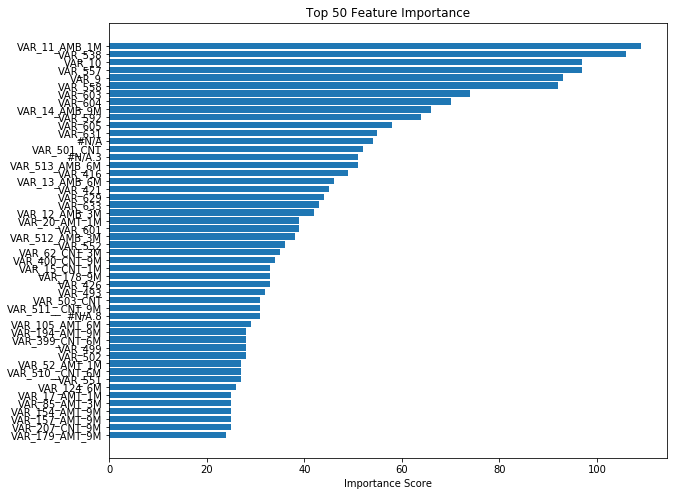

In [144]:
importance_dict = clf.get_booster().get_score(importance_type='weight')
importance_dict = {k: v for k,v in sorted(importance_dict.items(),key = lambda item: item[1], reverse = True)}
top_50_features = list(importance_dict.keys())[:50]
top_50_importance = list(importance_dict.values())[:50]

fig,ax = plt.subplots(figsize= (10,8))
ax.barh(top_50_features,top_50_importance)
ax.invert_yaxis()
plt.title("Top 50 Feature Importance")
plt.xlabel('Importance Score')
plt.show()

### Combining top 50 features present in RFE and Feature importance

In [148]:
l2 = list(set(f2) & set(top_50_features))
len(combined_set)

36

In [149]:
X_train_new = X_train_target[combined_set]
X_test_new = X_test[combined_set]

In [150]:
clf = xgb.XGBClassifier(learning_rate = 0.1, reg_alpha = 10, reg_lambda = 100, scale_pos_weight = weight_ratio,gamma =0)
clf.fit(X_train_new, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=10, ...)

In [151]:
y_pred = clf.predict(X_test_new)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print('Accuracy: {:}%'.format(accuracy*100))
print('Precision: {:}%'.format(precision*100))
print('Recall: {:}%'.format(recall*100))
print('F1-Score: {:}%'.format(f1score*100))

Accuracy: 87.06766917293233%
Precision: 13.60544217687075%
Recall: 30.76923076923077%
F1-Score: 18.867924528301888%


## DBScan Clustering on feature correlations

In [62]:
corr_matrix=X_train_target.corr().abs()

In [63]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
model1 = dbscan.fit(corr_matrix)

In [64]:
labels = model1.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [65]:
for i in set(labels):
    cluster_indices = np.where(labels ==i)[0]
    cluster_features = X_train_target.columns[cluster_indices]
    print(f'Features in cluster {i}: {cluster_features.tolist()}')

Features in cluster 0: ['VAR_18_CNT_1M', 'VAR_41_CNT_1M', 'VAR_57_CNT_3M', 'VAR_84_CNT_3M', 'VAR_104_CNT_6M', 'VAR_131_CNT_6M', 'VAR_155_CNT_9M', 'VAR_185_CNT_9M', 'VAR_223_CNT_1M', 'VAR_254_CNT_3M', 'VAR_290_CNT_6M', 'VAR_333_CNT_9M']
Features in cluster 1: ['VAR_46_AMT_1M', 'VAR_89_AMT_3M', 'VAR_136_AMT_6M', 'VAR_190_AMT_9M', 'VAR_220_AMT_1M', 'VAR_250_AMT_3M', 'VAR_286_AMT_6M', 'VAR_327_AMT_9M']
Features in cluster 2: ['VAR_47_CNT_1M', 'VAR_90_CNT_3M', 'VAR_137_CNT_6M', 'VAR_191_CNT_9M', 'VAR_232_CNT_1M', 'VAR_265_CNT_3M', 'VAR_301_CNT_6M', 'VAR_345_CNT_9M']
Features in cluster 3: ['VAR_53_CNT_1M', 'VAR_100_CNT_3M', 'VAR_149_CNT_6M', 'VAR_237_CNT_1M', 'VAR_273_CNT_3M', 'VAR_311_CNT_6M']
Features in cluster 4: ['VAR_16_CNT_1M', 'VAR_55_CNT_3M', 'VAR_102_CNT_6M', 'VAR_222_CNT_1M', 'VAR_253_CNT_3M', 'VAR_289_CNT_6M']
Features in cluster 5: ['VAR_64_CNT_3M', 'VAR_111_CNT_6M', 'VAR_116_CNT_6M', 'VAR_162_CNT_9M', 'VAR_168_CNT_9M', 'VAR_294_CNT_6M', 'VAR_337_CNT_9M']
Features in cluster 6:

In [66]:
clustered_data=pd.DataFrame({'Feature':corr_matrix.columns,'Cluster':labels})
cluster_count=clustered_data.groupby('Cluster').count().reset_index()
cluster_count=cluster_count.rename(columns={'Feature':'count'})
print(cluster_count)

    Cluster  count
0        -1    240
1         0     12
2         1      8
3         2      8
4         3      6
5         4      6
6         5      7
7         6      6
8         7      6
9         8      8
10        9      6
11       10      8
12       11      6
13       12      6
14       13      5


In [67]:
feature_dict = {}
for i in set(labels):
    if i != -1:
        cluster_indices = np.where(labels ==i)[0]
        cluster_features = X_train_target.columns[cluster_indices]
        feature_dict[i] = cluster_features.tolist()

## Clustering noise cluster using Kmeans

In [68]:
cluster_indices = np.where(labels ==-1)[0]
cluster_features = X_train_target.columns[cluster_indices]
noise_features = cluster_features.tolist()

In [70]:
X_train_noise = X_train_target[noise_features]
X_train_noise.head()

,VAR_9,VAR_10,VAR_11_AMB_1M,VAR_13_AMB_6M,VAR_14_AMB_9M,VAR_15_CNT_1M,VAR_17_AMT_1M,VAR_19_AMT_1M,VAR_20_AMT_1M,VAR_21_CNT_1M,VAR_22_AMT_1M,VAR_23_CNT_1M,VAR_32_AMT_1M,VAR_33_CNT_1M,VAR_34_1M,VAR_35_AMT_1M,VAR_36_CNT_1M,VAR_37_AMT_1M,VAR_38_CNT_1M,VAR_42_AMT_1M,VAR_52_AMT_1M,VAR_54_CNT_3M,VAR_56_AMT_3M,VAR_58_AMT_3M,VAR_59_AMT_3M,VAR_60_CNT_3M,VAR_61_AMT_3M,VAR_62_CNT_3M,VAR_63_CNT_3M,VAR_65_CNT_3M,VAR_75_AMT_3M,VAR_76_CNT_3M,VAR_77_3M,VAR_78_AMT_3M,VAR_79_CNT_3M,VAR_80_AMT_3M,VAR_87_AMT_3M,VAR_95_AMT_3M,VAR_101_CNT_6M,VAR_106_AMT_6M,VAR_107_CNT_6M,VAR_108_AMT_6M,VAR_109_CNT_6M,VAR_110_CNT_6M,VAR_112_CNT_6M,VAR_115_AMT_6M,VAR_121_6M,VAR_122_AMT_6M,VAR_123_CNT_6M,VAR_124_6M,VAR_125_AMT_6M,VAR_126_CNT_6M,VAR_127_AMT_6M,VAR_134_AMT_6M,VAR_138_AMT_6M,VAR_139_CNT_6M,VAR_144_AMT_6M,VAR_152_CNT_9M,VAR_153_CNT_9M,VAR_157_AMT_9M,VAR_158_CNT_9M,VAR_159_AMT_9M,VAR_160_CNT_9M,VAR_161_CNT_9M,VAR_163_CNT_9M,VAR_167_AMT_9M,VAR_171_AMT_9M,VAR_172_CNT_9M,VAR_173_9M,VAR_176_AMT_9M,VAR_177_CNT_9M,VAR_178_9M,VAR_179_AMT_9M,VAR_180_CNT_9M,VAR_181_AMT_9M,VAR_188_AMT_9M,VAR_194_AMT_9M,VAR_195_CNT_9M,VAR_202_AMT_9M,VAR_207_CNT_9M,VAR_210_AMT_1M,VAR_211_AMT_1M,VAR_212_AMT_1M,VAR_213_AMT_1M,VAR_215_AMT_1M,VAR_216_AMT_1M,VAR_218_AMT_1M,VAR_224_CNT_1M,VAR_225_CNT_1M,VAR_227_CNT_1M,VAR_228_CNT_1M,VAR_236_AMT_1M,VAR_238_AMT_3M,VAR_239_AMT_3M,VAR_240_AMT_3M,VAR_241_AMT_3M,VAR_245_AMT_3M,VAR_246_AMT_3M,VAR_249_AMT_3M,VAR_255_CNT_3M,VAR_256_CNT_3M,VAR_260_CNT_3M,VAR_268_AMT_3M,VAR_276_AMT_6M,VAR_277_AMT_6M,VAR_279_AMT_6M,VAR_281_AMT_6M,VAR_282_AMT_6M,VAR_285_AMT_6M,VAR_287_AMT_6M,VAR_291_CNT_6M,VAR_292_CNT_6M,VAR_296_CNT_6M,VAR_302_CNT_6M,VAR_306_AMT_6M,VAR_316_AMT_9M,VAR_317_AMT_9M,VAR_319_AMT_9M,VAR_322_AMT_9M,VAR_323_AMT_9M,VAR_326_AMT_9M,VAR_329_AMT_9M,VAR_332_CNT_9M,VAR_334_CNT_9M,VAR_335_CNT_9M,VAR_340_CNT_9M,VAR_347_CNT_9M,VAR_352_AMT_9M,VAR_357_CNT_9M,VAR_387_CNT,VAR_388_CNT,VAR_389_CNT,VAR_398_CNT_3M,VAR_399_CNT_6M,VAR_400_CNT_9M,VAR_426,VAR_435,VAR_437,VAR_438_1M,VAR_439,VAR_440_3M,VAR_441,VAR_442_6M,VAR_443,VAR_444_9M,VAR_451_AMT_1M,VAR_460_AMT_3M,VAR_464_AMT_6M,VAR_472_AMT_6M,VAR_476_AMT_9M,VAR_478_AMT_9M,VAR_480_AMT_9M,VAR_485_AMT_9M,VAR_488_AMT_9M,VAR_489,VAR_490,VAR_491,VAR_492,VAR_493,VAR_494,VAR_495,VAR_496,VAR_497,VAR_498,VAR_499,VAR_500,VAR_501_CNT,VAR_502,VAR_503_CNT,VAR_504,VAR_505,VAR_506__MTH_3M,VAR_507__MTH_6M,VAR_508__MTH_9M,VAR_509__CNT_3M,VAR_510__CNT_6M,VAR_511__CNT_9M,#N/A,#N/A.1,#N/A.3,#N/A.4,#N/A.5,#N/A.6,#N/A.7,#N/A.8,VAR_533,VAR_534,VAR_535,VAR_538,VAR_539,VAR_540,VAR_550,VAR_551,VAR_552,VAR_553,VAR_554,VAR_555,VAR_556,VAR_557,VAR_558,VAR_588,VAR_591,VAR_592,VAR_593,VAR_595,VAR_596,VAR_601,VAR_603,VAR_604,VAR_605,VAR_611,VAR_615,VAR_616,VAR_617,VAR_622,VAR_623,VAR_628,VAR_629,VAR_630,VAR_631,VAR_632,VAR_633,VAR_634,VAR_635,binned_day_since_VAR_2,binned_day_since_VAR_3,binned_day_since_VAR_4,binned_day_since_VAR_5,binned_day_since_VAR_6,binned_day_since_VAR_7,VAR_602_binned,VAR_606_binned,VAR_607_binned,VAR_608_binned,VAR_609_binned,VAR_610_binned,VAR_614_binned,VAR_625_binned,VAR_627_binned,VAR_626_binned
1155,26,97,342.86,1029.71,1295.22,49.0,49660.00,51145.00,26000.0,2.0,0.0,0.0,0.0,0.0,706.17,1339.0,5.0,0.0,0.0,23806.00,38660.0,161.0,197639.00,197528.00,42500.0,6.0,16500.0,4.0,21.0,21.0,200.0,1.0,200.00,3259.0,14.0,0.0,0.0,0.0,312.0,46000.0,8.0,20000.0,6.0,29.0,29.0,0.0,202.0625,600.00,2.0,300.000000,7900.00,38.0,0.0,0.0,0.0,0.0,0.0,479.0,165.0,128700.0,24.0,99700.0,21.0,30.0,29.0,0.0,12636.80,72.0,183.761235,1100.00,3.0,366.666667,13736.80,75.0,5000.0,5000.0,0.0,0.0,0.0,157.0,49660.00,51145.00,26000.0,0.0,1339.0,0.0,23806.00,2.0,0.0,5.0,0.0,38660.0,65879.666670,65842.66667,14166.666670,5500.000000,1086.333333,0.0,0.0,2.000000,1.333333,4.666667,0.0,7666.666667,3333.333333,0.000000,1316.666667,0.0,0.0,0.0,1.333333,1.000000,6.333333,0.0,0.000000,14300.000000,11077.777780,0.000000,1526.311111,555.555556,555.555556,0.0,18.333333,2.666667,2.333333,8.333333,0.0,0.000000,17.444444,1,1,1,0.0,0.0,0.0,1295.220000,0.0,1339.00,267.80,4

In [71]:
corr_mat = X_train_noise.corr().abs()

In [72]:
kmeans = KMeans(n_clusters = 20,init='k-means++',max_iter = 300, n_init = 10,random_state = 0)
corr_features_labels = kmeans.fit_predict(corr_mat)

In [73]:
#not transformed
cl_data = pd.DataFrame({'Feature':corr_mat.columns,'Cluster':corr_features_labels})
grouped_km_data= cl_data.groupby('Cluster')
for cluster, data in grouped_km_data:
    print(f"Cluster {cluster}: {list(data['Feature'])}")

Cluster 0: ['VAR_11_AMB_1M', 'VAR_13_AMB_6M', 'VAR_14_AMB_9M', 'VAR_426', 'VAR_506__MTH_3M', 'VAR_507__MTH_6M', 'VAR_508__MTH_9M', 'VAR_509__CNT_3M', 'VAR_510__CNT_6M', 'VAR_511__CNT_9M']
Cluster 1: ['VAR_21_CNT_1M', 'VAR_23_CNT_1M', 'VAR_60_CNT_3M', 'VAR_61_AMT_3M', 'VAR_62_CNT_3M', 'VAR_107_CNT_6M', 'VAR_108_AMT_6M', 'VAR_109_CNT_6M', 'VAR_158_CNT_9M', 'VAR_159_AMT_9M', 'VAR_160_CNT_9M', 'VAR_224_CNT_1M', 'VAR_225_CNT_1M', 'VAR_241_AMT_3M', 'VAR_255_CNT_3M', 'VAR_256_CNT_3M', 'VAR_277_AMT_6M', 'VAR_291_CNT_6M', 'VAR_292_CNT_6M', 'VAR_317_AMT_9M', 'VAR_334_CNT_9M', 'VAR_335_CNT_9M']
Cluster 2: ['VAR_35_AMT_1M', 'VAR_78_AMT_3M', 'VAR_125_AMT_6M', 'VAR_171_AMT_9M', 'VAR_179_AMT_9M', 'VAR_215_AMT_1M', 'VAR_245_AMT_3M', 'VAR_281_AMT_6M', 'VAR_322_AMT_9M']
Cluster 3: ['VAR_115_AMT_6M', 'VAR_167_AMT_9M', 'VAR_279_AMT_6M', 'VAR_319_AMT_9M']
Cluster 4: ['VAR_9', 'VAR_10', 'VAR_387_CNT', 'VAR_388_CNT', 'VAR_389_CNT', 'VAR_435', 'VAR_464_AMT_6M', 'VAR_476_AMT_9M', 'VAR_502', 'VAR_504', 'VAR_505

In [74]:
clustered_data=pd.DataFrame({'Feature':corr_mat.columns,'Cluster':corr_features_labels})
cluster_count=clustered_data.groupby('Cluster').count().reset_index()
cluster_count=cluster_count.rename(columns={'Feature':'count'})
print(cluster_count)

    Cluster  count
0         0     10
1         1     22
2         2      9
3         3      4
4         4     44
5         5      9
6         6     14
7         7      8
8         8     12
9         9     10
10       10     14
11       11      8
12       12     13
13       13      9
14       14      9
15       15      6
16       16      9
17       17     17
18       18      3
19       19     10


In [75]:
#transformation
cl_data = pd.DataFrame({'Feature':corr_mat.columns,'Cluster':corr_features_labels})
grouped_km_data=cl_data.groupby('Cluster')
k = 14
for cluster, data in grouped_km_data:
    feature_dict[k] = data['Feature'].tolist()
    k = k+1 

In [76]:
feature_dict

{0: ['VAR_18_CNT_1M',
  'VAR_41_CNT_1M',
  'VAR_57_CNT_3M',
  'VAR_84_CNT_3M',
  'VAR_104_CNT_6M',
  'VAR_131_CNT_6M',
  'VAR_155_CNT_9M',
  'VAR_185_CNT_9M',
  'VAR_223_CNT_1M',
  'VAR_254_CNT_3M',
  'VAR_290_CNT_6M',
  'VAR_333_CNT_9M'],
 1: ['VAR_46_AMT_1M',
  'VAR_89_AMT_3M',
  'VAR_136_AMT_6M',
  'VAR_190_AMT_9M',
  'VAR_220_AMT_1M',
  'VAR_250_AMT_3M',
  'VAR_286_AMT_6M',
  'VAR_327_AMT_9M'],
 2: ['VAR_47_CNT_1M',
  'VAR_90_CNT_3M',
  'VAR_137_CNT_6M',
  'VAR_191_CNT_9M',
  'VAR_232_CNT_1M',
  'VAR_265_CNT_3M',
  'VAR_301_CNT_6M',
  'VAR_345_CNT_9M'],
 3: ['VAR_53_CNT_1M',
  'VAR_100_CNT_3M',
  'VAR_149_CNT_6M',
  'VAR_237_CNT_1M',
  'VAR_273_CNT_3M',
  'VAR_311_CNT_6M'],
 4: ['VAR_16_CNT_1M',
  'VAR_55_CNT_3M',
  'VAR_102_CNT_6M',
  'VAR_222_CNT_1M',
  'VAR_253_CNT_3M',
  'VAR_289_CNT_6M'],
 5: ['VAR_64_CNT_3M',
  'VAR_111_CNT_6M',
  'VAR_116_CNT_6M',
  'VAR_162_CNT_9M',
  'VAR_168_CNT_9M',
  'VAR_294_CNT_6M',
  'VAR_337_CNT_9M'],
 6: ['VAR_81_CNT_3M',
  'VAR_128_CNT_6M',
  'VAR

### Information-Value of features

In [77]:
iv_dataframe= get_iv_score(train_copy)
iv_dataframe

,IV score
TARGET,0.183917
VAR_426,0.181294
VAR_14_AMB_9M,0.179762
VAR_421,0.179445
VAR_13_AMB_6M,0.177883
VAR_416,0.175317
VAR_12_AMB_3M,0.173387
VAR_154_AMT_9M,0.170075
VAR_314_AMT_9M,0.170075
VAR_513_AMB_6M,0.168882


In [78]:
cluster_feature_list =[]
for cluster, features in feature_dict.items():
    for feature in features:
        cluster_feature_list.append({'Cluster': cluster, 'Feature': feature})
        
feat_df= pd.DataFrame(cluster_feature_list)
feat_df["IV"]= iv_dataframe.loc[feat_df['Feature'] , 'IV score'].values
feat_df.sort_values(by=['Cluster','IV'], inplace = True)
feat_df.reset_index(inplace = True)
feat_df.drop('index',axis =1 ,inplace = True)
feat_df

,Cluster,Feature,IV
0,0,VAR_18_CNT_1M,0.019640
1,0,VAR_223_CNT_1M,0.019640
2,0,VAR_41_CNT_1M,0.020901
3,0,VAR_84_CNT_3M,0.033763
4,0,VAR_57_CNT_3M,0.037186
5,0,VAR_254_CNT_3M,0.037186
6,0,VAR_131_CNT_6M,0.046620
7,0,VAR_104_CNT_6M,0.049580
8,0,VAR_290_CNT_6M,0.049580
9,0,VAR_185_CNT_9M,0.055819


In [79]:
top_features = feat_df.groupby('Cluster').apply(lambda x:x.nlargest(3,'IV')).reset_index(drop=True)
top_features

,Cluster,Feature,IV
0,0,VAR_155_CNT_9M,0.057469
1,0,VAR_333_CNT_9M,0.057469
2,0,VAR_185_CNT_9M,0.055819
3,1,VAR_190_AMT_9M,0.063823
4,1,VAR_327_AMT_9M,0.063823
5,1,VAR_136_AMT_6M,0.060929
6,2,VAR_191_CNT_9M,0.005861
7,2,VAR_345_CNT_9M,0.005861
8,2,VAR_137_CNT_6M,0.005542
9,3,VAR_149_CNT_6M,0.032362


### Function for selecting first and second highest features and creating subsets

In [80]:
def select_features(df):
    first_features =[]
    second_features =[]
    third_features =[]
    for cluster,group in df.groupby('Cluster'):
        first_feature =group['Feature'].head(1).values[0]
        second_feature = group['Feature'].iloc[1]
        third_feature = group['Feature'].iloc[2]
        
        first_features.append(first_feature)
        second_features.append(second_feature)
        third_features.append(third_feature)
    
    return (first_features,second_features, third_features)

In [81]:
g,c,n = select_features(top_features)

In [82]:
print("First set of varibles", g)
print()
print("Second set of attributes",c)
print()
print("third set of attribute", n)

First set of varibles ['VAR_155_CNT_9M', 'VAR_190_AMT_9M', 'VAR_191_CNT_9M', 'VAR_149_CNT_6M', 'VAR_102_CNT_6M', 'VAR_168_CNT_9M', 'VAR_182_CNT_9M', 'VAR_186_AMT_9M', 'VAR_187_CNT_9M', 'VAR_145_CNT_6M', 'VAR_154_AMT_9M', 'VAR_189_CNT_9M', 'VAR_206_AMT_9M', 'VAR_421', 'VAR_426', 'VAR_159_AMT_9M', 'VAR_179_AMT_9M', 'VAR_167_AMT_9M', 'VAR_557', 'VAR_180_CNT_9M', 'VAR_181_AMT_9M', 'VAR_444_9M', 'VAR_42_AMT_1M', 'VAR_157_AMT_9M', 'VAR_605', 'VAR_58_AMT_3M', 'VAR_485_AMT_9M', 'VAR_478_AMT_9M', 'VAR_551', 'VAR_202_AMT_9M', '#N/A.6', 'VAR_443', 'VAR_400_CNT_9M', 'VAR_194_AMT_9M']

Second set of attributes ['VAR_333_CNT_9M', 'VAR_327_AMT_9M', 'VAR_345_CNT_9M', 'VAR_311_CNT_6M', 'VAR_289_CNT_6M', 'VAR_337_CNT_9M', 'VAR_341_CNT_9M', 'VAR_325_AMT_9M', 'VAR_343_CNT_9M', 'VAR_307_CNT_6M', 'VAR_314_AMT_9M', 'VAR_344_CNT_9M', 'VAR_356_AMT_9M', 'VAR_416', 'VAR_14_AMB_9M', 'VAR_317_AMT_9M', 'VAR_322_AMT_9M', 'VAR_319_AMT_9M', 'VAR_603', 'VAR_340_CNT_9M', 'VAR_323_AMT_9M', 'VAR_178_9M', 'VAR_218_AMT_1M',

### Best Features selection iteration on RF

In [83]:
def replace_elements(l1,l2,X_train,y_train,X_test,y_test):
    
    pd.set_option('display.max_colwidth', -1)
    results =[]
    for i in range(len(l1)):
        new_list =l1.copy()
        new_list[i]=l2[i]
        clf = RandomForestClassifier(n_estimators=100,random_state= 40, max_depth=8, class_weight='balanced')
        clf.fit(X_train[new_list],y_train)
        y_pred = clf.predict(X_test[new_list])
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        f1score = f1_score(y_test,y_pred)
        
        results.append([new_list,accuracy, precision, recall,f1score])
    return pd.DataFrame(results,columns=['new_list','accuracy','precision','recall','F1-Score'])

In [84]:
pd.set_option("display.max_rows",None)

In [89]:
r = replace_elements(g,c,X_train_target,y_train,X_test,y_test)

In [90]:
#features from 1 and 2
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_333_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
1,"[VAR_155_CNT_9M, VAR_327_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
2,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_345_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
3,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_311_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
4,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_289_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
5,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_337_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
6,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_341_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.155039,0.307692,0.206186
7,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_325_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_17

In [88]:
#features from 2 and 3
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_185_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.876692,0.138686,0.292308,0.188119
1,"[VAR_333_CNT_9M, VAR_136_AMT_6M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.869173,0.129252,0.292308,0.179245
2,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_137_CNT_6M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.873684,0.139860,0.307692,0.192308
3,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_100_CNT_3M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.873684,0.118519,0.246154,0.160000
4,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_55_CNT_3M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.875188,0.131387,0.276923,0.178218
5,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_162_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.875940,0.137681,0.292308,0.187192
6,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_128_CNT_6M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.873684,0.134752,0.292308,0.184466
7,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_132_AMT_6M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_

In [86]:
#features from 1 and 3
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_185_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.885714,0.162791,0.323077,0.216495
1,"[VAR_155_CNT_9M, VAR_136_AMT_6M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.885714,0.152000,0.292308,0.200000
2,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_137_CNT_6M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884962,0.161538,0.323077,0.215385
3,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_100_CNT_3M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.881955,0.140625,0.276923,0.186528
4,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_55_CNT_3M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.886466,0.147541,0.276923,0.192513
5,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_162_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.885714,0.152000,0.292308,0.200000
6,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_128_CNT_6M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.884211,0.149606,0.292308,0.197917
7,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_132_AMT_6M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179

### Best Features selection iteration on XGB

In [91]:
def replace_elements(l1,l2,X_train,y_train,X_test,y_test):
    
    pd.set_option('display.max_colwidth', -1)
    weight_ratio = len(y_train[y_train ==0]) / len(y_train[y_train ==1])
    results =[]
    for i in range(len(l1)):
        new_list =l1.copy()
        new_list[i]=l2[i]
        
        clf = xgb.XGBClassifier(learning_rate = 0.1, reg_alpha = 10, reg_lambda = 100, scale_pos_weight = weight_ratio,gamma =0)
        clf.fit(X_train[new_list],y_train)
        y_pred = clf.predict(X_test[new_list])
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        f1score = f1_score(y_test,y_pred)
        
        results.append([new_list,accuracy, precision, recall,f1score])
    return pd.DataFrame(results,columns=['new_list','accuracy','precision','recall','F1-Score'])

In [96]:
r = replace_elements(g,c,X_train_target,y_train,X_test,y_test)

In [97]:
#features with 1 and 2
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_333_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
1,"[VAR_155_CNT_9M, VAR_327_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
2,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_345_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
3,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_311_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
4,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_289_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
5,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_337_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
6,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_341_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.839850,0.130000,0.400000,0.196226
7,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_325_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_17

In [95]:
#features with 2 and 3
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_185_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.846617,0.136126,0.400000,0.203125
1,"[VAR_333_CNT_9M, VAR_136_AMT_6M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.845113,0.134715,0.400000,0.201550
2,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_137_CNT_6M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.845113,0.130890,0.384615,0.195312
3,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_100_CNT_3M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.844361,0.126316,0.369231,0.188235
4,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_55_CNT_3M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.850376,0.135870,0.384615,0.200803
5,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_162_CNT_9M, VAR_341_CNT_9M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.842857,0.132653,0.400000,0.199234
6,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_128_CNT_6M, VAR_325_AMT_9M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_14_AMB_9M, VAR_317_AMT_9M, VAR_322_AMT_9M, VAR_319_AMT_9M, VAR_603, VAR_340_CNT_9M, VAR_323_AMT_9M, VAR_178_9M, VAR_218_AMT_1M, VAR_316_AMT_9M, VAR_616, VAR_239_AMT_3M, VAR_472_AMT_6M, VAR_173_9M, VAR_550, VAR_352_AMT_9M, #N/A.3, VAR_441, VAR_399_CNT_6M, VAR_329_AMT_9M]",0.848872,0.138298,0.400000,0.205534
7,"[VAR_333_CNT_9M, VAR_327_AMT_9M, VAR_345_CNT_9M, VAR_311_CNT_6M, VAR_289_CNT_6M, VAR_337_CNT_9M, VAR_341_CNT_9M, VAR_132_AMT_6M, VAR_343_CNT_9M, VAR_307_CNT_6M, VAR_314_AMT_9M, VAR_344_CNT_9M, VAR_356_AMT_9M, VAR_416, VAR_

In [93]:
#features with 1 and 3
r

,new_list,accuracy,precision,recall,F1-Score
0,"[VAR_185_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.841353,0.138614,0.430769,0.209738
1,"[VAR_155_CNT_9M, VAR_136_AMT_6M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.842105,0.146341,0.461538,0.222222
2,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_137_CNT_6M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.841353,0.149038,0.476923,0.227106
3,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_100_CNT_3M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.841353,0.138614,0.430769,0.209738
4,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_55_CNT_3M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.846617,0.150754,0.461538,0.227273
5,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_162_CNT_9M, VAR_182_CNT_9M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.837594,0.131707,0.415385,0.200000
6,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_128_CNT_6M, VAR_186_AMT_9M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179_AMT_9M, VAR_167_AMT_9M, VAR_557, VAR_180_CNT_9M, VAR_181_AMT_9M, VAR_444_9M, VAR_42_AMT_1M, VAR_157_AMT_9M, VAR_605, VAR_58_AMT_3M, VAR_485_AMT_9M, VAR_478_AMT_9M, VAR_551, VAR_202_AMT_9M, #N/A.6, VAR_443, VAR_400_CNT_9M, VAR_194_AMT_9M]",0.845865,0.146465,0.446154,0.220532
7,"[VAR_155_CNT_9M, VAR_190_AMT_9M, VAR_191_CNT_9M, VAR_149_CNT_6M, VAR_102_CNT_6M, VAR_168_CNT_9M, VAR_182_CNT_9M, VAR_132_AMT_6M, VAR_187_CNT_9M, VAR_145_CNT_6M, VAR_154_AMT_9M, VAR_189_CNT_9M, VAR_206_AMT_9M, VAR_421, VAR_426, VAR_159_AMT_9M, VAR_179

In [98]:
s1 = ['VAR_155_CNT_9M', 'VAR_190_AMT_9M', 'VAR_191_CNT_9M', 'VAR_149_CNT_6M', 'VAR_102_CNT_6M', 'VAR_168_CNT_9M',
 'VAR_182_CNT_9M', 'VAR_186_AMT_9M', 'VAR_133_CNT_6M', 'VAR_145_CNT_6M', 'VAR_154_AMT_9M', 'VAR_189_CNT_9M',
 'VAR_206_AMT_9M', 'VAR_421', 'VAR_426', 'VAR_159_AMT_9M', 'VAR_179_AMT_9M', 'VAR_167_AMT_9M', 'VAR_557', 
'VAR_180_CNT_9M', 'VAR_181_AMT_9M', 'VAR_444_9M', 'VAR_42_AMT_1M', 'VAR_157_AMT_9M', 'VAR_605', 'VAR_58_AMT_3M', 
'VAR_485_AMT_9M', 'VAR_478_AMT_9M', 'VAR_551', 'VAR_202_AMT_9M', '#N/A.6', 'VAR_443', 'VAR_400_CNT_9M', 'VAR_194_AMT_9M']

In [99]:
s2 = ['VAR_155_CNT_9M', 'VAR_190_AMT_9M', 'VAR_191_CNT_9M', 'VAR_149_CNT_6M', 'VAR_102_CNT_6M', 'VAR_168_CNT_9M',
 'VAR_182_CNT_9M', 'VAR_186_AMT_9M', 'VAR_187_CNT_9M', 'VAR_145_CNT_6M', 'VAR_154_AMT_9M', 'VAR_189_CNT_9M',
 'VAR_206_AMT_9M', 'VAR_421', 'VAR_426', 'VAR_108_AMT_6M', 'VAR_179_AMT_9M', 'VAR_167_AMT_9M', 'VAR_557', 
'VAR_180_CNT_9M', 'VAR_181_AMT_9M', 'VAR_444_9M', 'VAR_42_AMT_1M', 'VAR_157_AMT_9M', 'VAR_605', 'VAR_58_AMT_3M',
 'VAR_485_AMT_9M', 'VAR_478_AMT_9M', 'VAR_551', 'VAR_202_AMT_9M', '#N/A.6', 'VAR_443', 'VAR_400_CNT_9M', 'VAR_194_AMT_9M']

In [108]:
common_features = list(set(s1) & set(s2))
len(common_features)

32

In [109]:
#Best Features
common_features

['VAR_400_CNT_9M',
 'VAR_181_AMT_9M',
 'VAR_444_9M',
 'VAR_149_CNT_6M',
 'VAR_186_AMT_9M',
 'VAR_478_AMT_9M',
 'VAR_180_CNT_9M',
 'VAR_206_AMT_9M',
 'VAR_157_AMT_9M',
 'VAR_58_AMT_3M',
 'VAR_605',
 'VAR_190_AMT_9M',
 'VAR_557',
 'VAR_426',
 '#N/A.6',
 'VAR_421',
 'VAR_154_AMT_9M',
 'VAR_189_CNT_9M',
 'VAR_202_AMT_9M',
 'VAR_167_AMT_9M',
 'VAR_155_CNT_9M',
 'VAR_102_CNT_6M',
 'VAR_145_CNT_6M',
 'VAR_443',
 'VAR_179_AMT_9M',
 'VAR_485_AMT_9M',
 'VAR_42_AMT_1M',
 'VAR_182_CNT_9M',
 'VAR_551',
 'VAR_168_CNT_9M',
 'VAR_194_AMT_9M',
 'VAR_191_CNT_9M']

In [ ]:
common_features = ['VAR_400_CNT_9M',
 'VAR_181_AMT_9M',
 'VAR_444_9M',
 'VAR_149_CNT_6M',
 'VAR_186_AMT_9M',
 'VAR_478_AMT_9M',
 'VAR_180_CNT_9M',
 'VAR_206_AMT_9M',
 'VAR_157_AMT_9M',
 'VAR_58_AMT_3M',
 'VAR_605',
 'VAR_190_AMT_9M',
 'VAR_557',
 'VAR_426',
 '#N/A.6',
 'VAR_421',
 'VAR_154_AMT_9M',
 'VAR_189_CNT_9M',
 'VAR_202_AMT_9M',
 'VAR_167_AMT_9M',
 'VAR_155_CNT_9M',
 'VAR_102_CNT_6M',
 'VAR_145_CNT_6M',
 'VAR_443',
 'VAR_179_AMT_9M',
 'VAR_485_AMT_9M',
 'VAR_42_AMT_1M',
 'VAR_182_CNT_9M',
 'VAR_551',
 'VAR_168_CNT_9M',
 'VAR_194_AMT_9M',
 'VAR_191_CNT_9M']

In [115]:
resulting_df = pd.DataFrame(columns = ['Cluster','Feature','IV'])
for feat in common_features:
    subset = feat_df[feat_df['Feature'] == feat]
    resulting_df = resulting_df.append(subset,ignore_index = True)
    resulting_df = resulting_df.sort_values('Cluster', ascending = True)
resulting_df

,Cluster,Feature,IV
0,0,VAR_155_CNT_9M,0.057469
1,1,VAR_190_AMT_9M,0.063823
31,2,VAR_191_CNT_9M,0.005861
2,3,VAR_149_CNT_6M,0.032362
3,4,VAR_102_CNT_6M,0.038195
4,5,VAR_168_CNT_9M,0.004225
5,6,VAR_182_CNT_9M,0.013969
6,7,VAR_186_AMT_9M,0.137926
7,9,VAR_145_CNT_6M,0.007506
8,10,VAR_154_AMT_9M,0.170075


## Best features returned

['VAR_155_CNT_9M', 
'VAR_190_AMT_9M', 
'VAR_191_CNT_9M', 
'VAR_149_CNT_6M',
 'VAR_102_CNT_6M', 
'VAR_168_CNT_9M',
 'VAR_182_CNT_9M', 
'VAR_186_AMT_9M',
 'VAR_133_CNT_6M',
 'VAR_145_CNT_6M', 
'VAR_154_AMT_9M', 
'VAR_189_CNT_9M',
 'VAR_206_AMT_9M', 
'VAR_421', 
'VAR_426',
 'VAR_159_AMT_9M',
 'VAR_179_AMT_9M', 
'VAR_167_AMT_9M',
 'VAR_557',
 'VAR_180_CNT_9M',
 'VAR_181_AMT_9M',
 'VAR_444_9M',
 'VAR_42_AMT_1M',
 'VAR_157_AMT_9M',
 'VAR_605', 
'VAR_58_AMT_3M', 
'VAR_485_AMT_9M',
 'VAR_478_AMT_9M', 
'VAR_551', 
'VAR_202_AMT_9M',
 '#N/A.6',
 'VAR_443', 
'VAR_400_CNT_9M', 
'VAR_194_AMT_9M']